In [1]:
"""
to leverage on R functions in conda environment
"""
import os
os.environ['R_HOME'] = "C://Users//user//.conda//envs//base-geemap-mamba-v2//Lib//R"

import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

#Must be activated
pandas2ri.activate()

# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

import rpy2.robjects.lib.ggplot2 as gp

C:\Users\user\.conda\envs\base-geemap-mamba-v2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(
C:\Users\user\.conda\envs\base-geemap-mamba-v2\Lib\site-packages\rpy2\robjects\lib\ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.2
  warnings.warn(


In [2]:
# Data manipulation

# for dataframe for up to 2D data structure
import pandas as pd
# to use sql syntax to handle and process pandas dataframe 
from pandasql import sqldf 

"""
# for multi-dimensional data structure analytics 
# can work with pandas for better multi-dimensional data structure  
"""
import numpy as np   

"""
Python Library for Low-Code Data Visualization 
"""
import seaborn as sns
import matplotlib.pyplot as plt

"""
SQL 
"""
import pandasql as ps

# to display important warning messages from Python
import warnings
warnings.filterwarnings('ignore')

In [3]:
eda_ppi = pd.read_csv("C://Users//user//Downloads//ppi.csv")

In [4]:
eda_ppi_t = eda_ppi.transpose()

In [5]:
eda_ppi_tt = eda_ppi.transpose().transpose().describe(include = 'all')

In [6]:
eda_ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           170 non-null    object 
 1   overall        170 non-null    float64
 2   agriculture    170 non-null    float64
 3   mining         170 non-null    float64
 4   manufacturing  170 non-null    float64
 5   electricity    170 non-null    float64
 6   water          170 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [7]:
eda_ppi_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, date to water
Columns: 170 entries, 0 to 169
dtypes: object(170)
memory usage: 9.6+ KB


In [8]:
eda_ppi_tt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, count to freq
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4 non-null      object 
 1   overall        4 non-null      float64
 2   agriculture    4 non-null      float64
 3   mining         4 non-null      float64
 4   manufacturing  4 non-null      float64
 5   electricity    4 non-null      float64
 6   water          4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 256.0+ bytes


In [9]:
eda_ppi.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


In [10]:
eda_ppi.tail()

,date,overall,agriculture,mining,manufacturing,electricity,water
165,2023-10-01,119.0,121.6,103.9,120.7,117.5,118.6
166,2023-11-01,118.2,123.2,99.0,120.1,117.3,118.8
167,2023-12-01,118.0,123.2,97.4,120.0,117.0,118.3
168,2024-01-01,117.9,125.7,96.7,119.8,117.1,118.7
169,2024-02-01,118.7,129.0,102.2,119.8,118.1,121.9


In [11]:
eda_ppi.describe()

,overall,agriculture,mining,manufacturing,electricity,water
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,108.711176,110.570588,105.117647,108.820000,112.990588,110.440588
std,6.424375,19.048057,25.186752,5.833748,5.907064,5.175448
min,98.400000,87.300000,44.700000,98.800000,99.400000,99.100000
25%,104.175000,94.925000,92.025000,105.700000,108.300000,106.325000
50%,107.850000,107.100000,100.250000,107.450000,115.650000,111.900000
75%,113.200000,121.675000,122.875000,109.900000,117.175000,114.175000
max,124.100000,178.700000,157.200000,122.800000,123.300000,121.900000


In [12]:
type(eda_ppi)

pandas.core.frame.DataFrame

In [13]:
type(eda_ppi_t)

pandas.core.frame.DataFrame

In [14]:
# #converts values in df into string 
# eda_ppi_2 = eda_ppi_2.applymap(str)
# # Double check that values have changed
# print(type(eda_ppi_2['In_Final_Phase_Variant_Calling'][0]))

In [15]:
# Number of dimension of this dataset
eda_ppi.ndim

2

In [16]:
import pandas as pd

# Assume 'df' is your DataFrame
# Check if any of the specified columns have the value 100
selected_columns = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']  # adjust column names as necessary
result = eda_ppi[eda_ppi[selected_columns].eq(100).any(axis=1)]
result_close100 = eda_ppi[eda_ppi[selected_columns].apply(lambda x: (x - 100).abs().min(), axis=1) < 0.1]

# Display or use the filtered DataFrame
print(result)
print(result_close100)


Empty DataFrame
Columns: [date, overall, agriculture, mining, manufacturing, electricity, water]
Index: []
           date  overall  agriculture  mining  manufacturing  electricity  \
2    2010-03-01     99.9         96.1   108.6           99.2        100.5   
3    2010-04-01     99.8         95.3   107.7           99.3         99.7   
5    2010-06-01     99.0         94.4    97.6           99.6         99.8   
9    2010-10-01    100.9        104.6   105.7           99.9        100.1   
48   2014-01-01    111.9         99.9   144.4          109.3        110.4   
77   2016-06-01     99.9        104.9    73.2          102.1        113.3   
123  2020-04-01     99.9         98.2    44.7          106.1        118.1   

     water  
2     99.2  
3     99.9  
5     99.9  
9     99.8  
48   106.6  
77   114.9  
123  111.1  


In [17]:
# Convert the date column to date format
eda_ppi_2 = eda_ppi.copy()
eda_ppi_2["date"] = pd.to_datetime(eda_ppi_2["date"])
eda_ppi_2.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


In [18]:
eda_ppi_2.describe(include = 'all')

,date,overall,agriculture,mining,manufacturing,electricity,water
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2017-01-15 02:57:52.941176576,108.711176,110.570588,105.117647,108.820000,112.990588,110.440588
min,2010-01-01 00:00:00,98.400000,87.300000,44.700000,98.800000,99.400000,99.100000
25%,2013-07-08 18:00:00,104.175000,94.925000,92.025000,105.700000,108.300000,106.325000
50%,2017-01-16 12:00:00,107.850000,107.100000,100.250000,107.450000,115.650000,111.900000
75%,2020-07-24 06:00:00,113.200000,121.675000,122.875000,109.900000,117.175000,114.175000
max,2024-02-01 00:00:00,124.100000,178.700000,157.200000,122.800000,123.300000,121.900000
std,NaN,6.424375,19.048057,25.186752,5.833748,5.907064,5.175448


In [19]:
eda_ppi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           170 non-null    datetime64[ns]
 1   overall        170 non-null    float64       
 2   agriculture    170 non-null    float64       
 3   mining         170 non-null    float64       
 4   manufacturing  170 non-null    float64       
 5   electricity    170 non-null    float64       
 6   water          170 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.4 KB


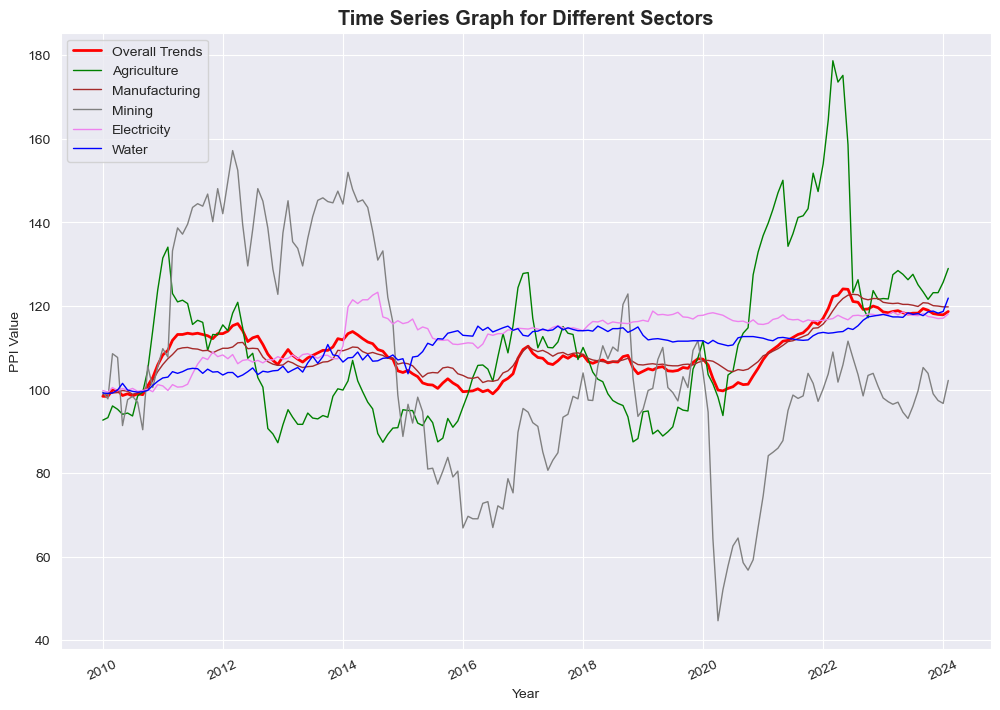

In [20]:
# create the time series plot 
plt.figure(figsize=(12,8))
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', linewidth=2, color="red")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['agriculture'], label='Agriculture', linewidth=1, color="green")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['manufacturing'], label='Manufacturing', linewidth=1, color="brown")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['mining'], label='Mining', linewidth=1, color="grey")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['electricity'], label='Electricity', linewidth=1, color="violet")
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['water'], label='Water', linewidth=1, color="blue")
plt.ylabel("PPI Value") 
plt.xlabel("Year")
plt.title('Time Series Graph for Different Sectors', fontsize = 'x-large', fontweight = 'bold')
plt.xticks(rotation = 25)
plt.show()

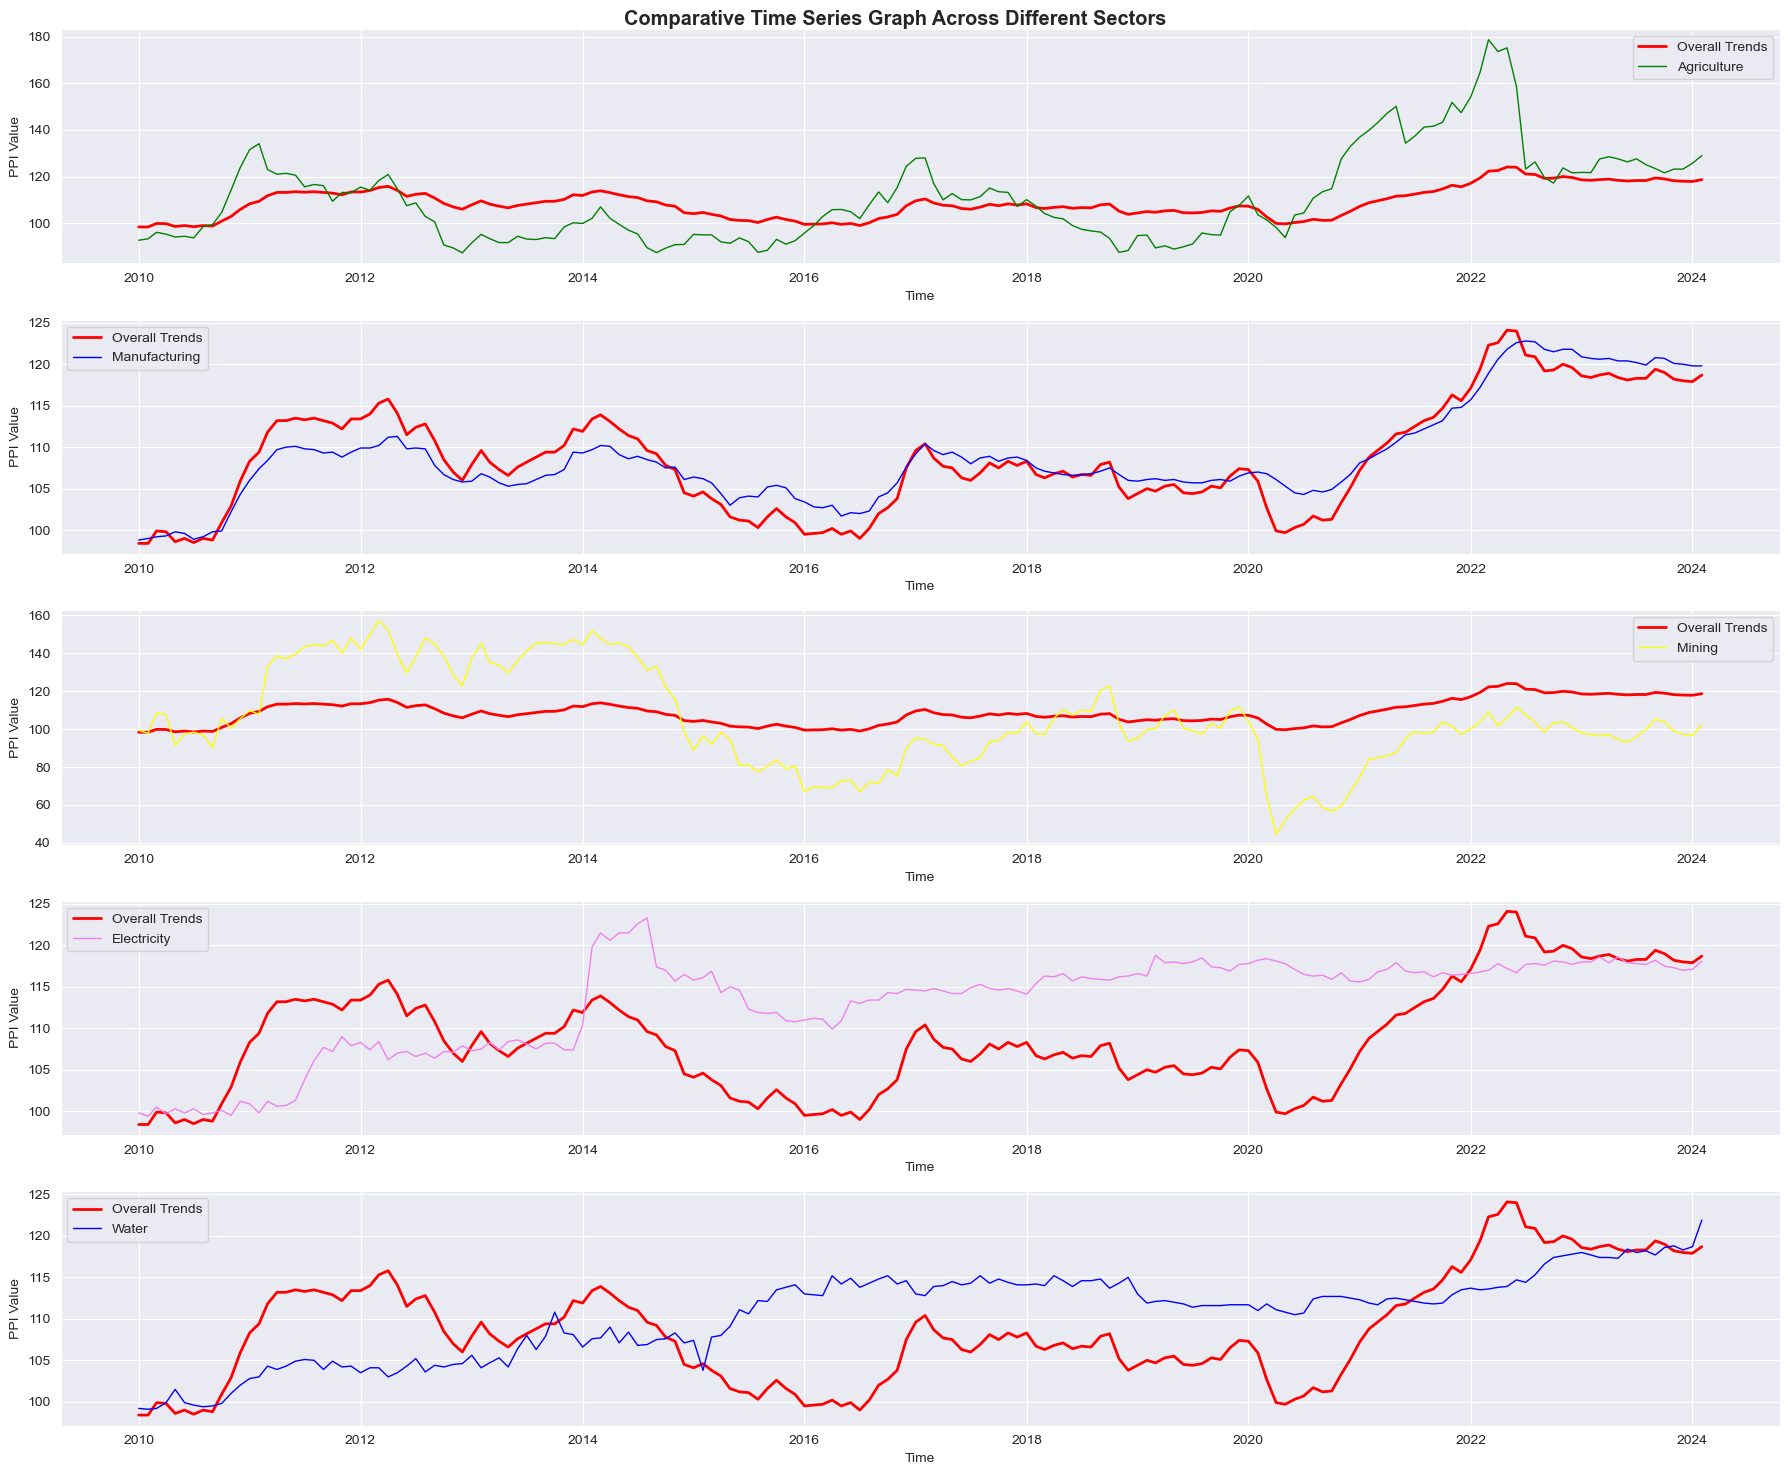

In [21]:
# Set the date column as the index
eda_ppi_2.set_index('date', inplace=False)

# Create subplots with 5 rows and 1 column
fig, ax = plt.subplots(5, 1, figsize=(18, 15))
fig.suptitle('Comparative Time Series Graph Across Different Sectors', fontsize='x-large', fontweight='bold')

# Overall and Agriculture
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[0], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['agriculture'], label='Agriculture', ax=ax[0], color='green', linewidth=1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('PPI Value')

# Overall and Manufacturing
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[1], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['manufacturing'], label='Manufacturing', ax=ax[1], color='blue', linewidth=1)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('PPI Value')

# Overall and Mining
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[2], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['mining'], label='Mining', ax=ax[2], color='yellow', linewidth=1)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('PPI Value')

# Overall and Electricity
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[3], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['electricity'], label='Electricity', ax=ax[3], color='violet', linewidth=1)
ax[3].set_xlabel('Time')
ax[3].set_ylabel('PPI Value')

# Overall and Water
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['overall'], label='Overall Trends', ax=ax[4], color='red', linewidth=2)
sns.lineplot(x=eda_ppi_2['date'], y=eda_ppi_2['water'], label='Water', ax=ax[4], color='blue', linewidth=1)
ax[4].set_xlabel('Time')
ax[4].set_ylabel('PPI Value')

plt.tight_layout()

In [22]:
eda_ppi_2.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


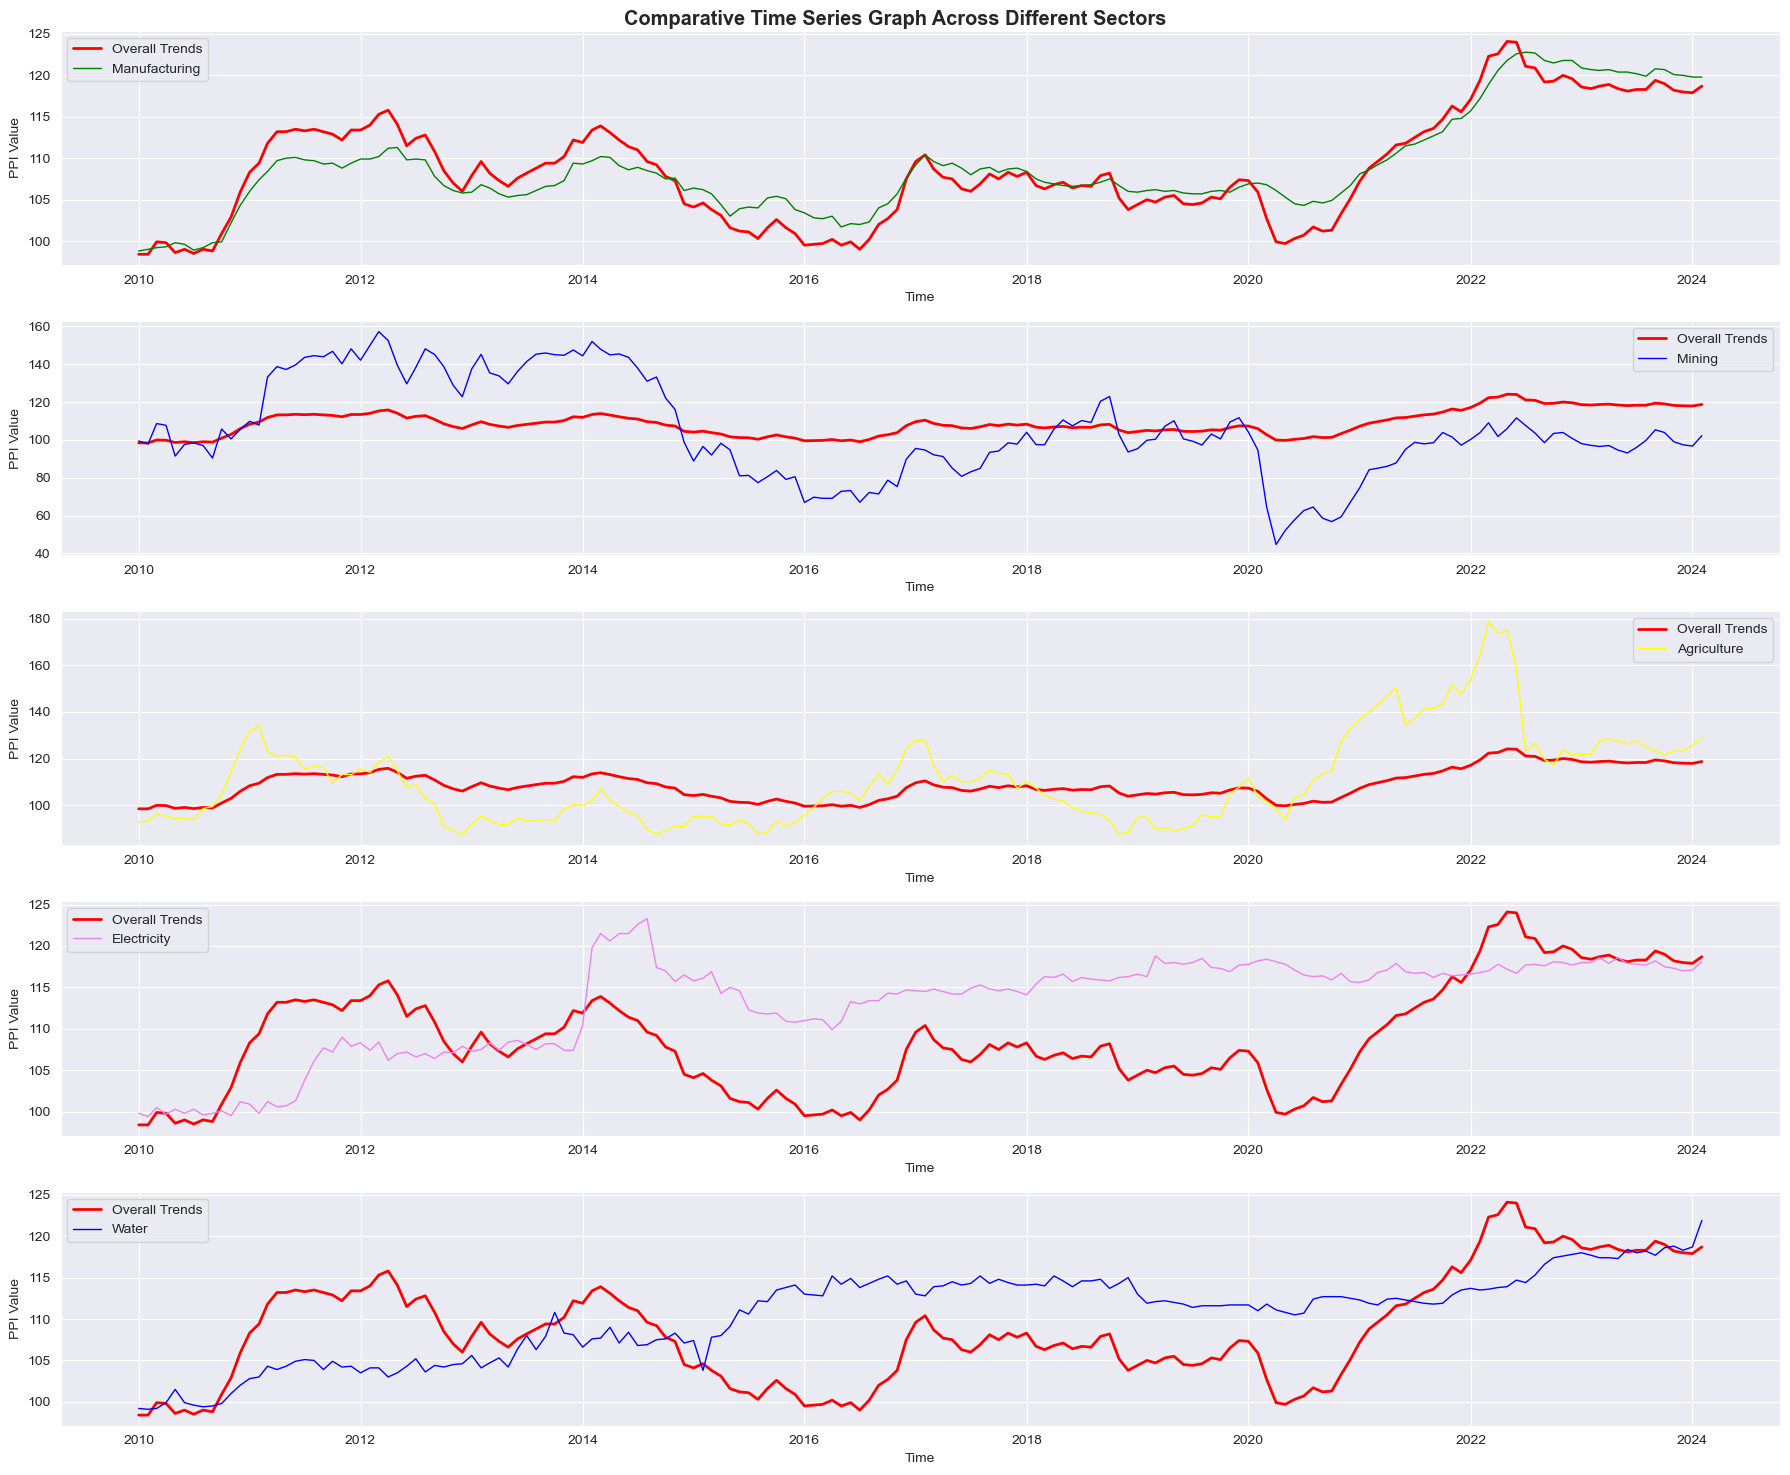

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comparative_time_series(df, sectors, colors, linewidths, figsize=(18, 15), suptitle='Comparative Time Series Graph Across Different Sectors'):
    """
    Plots a comparative time series graph for different sectors against an 'overall' trend.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the time series data.
        sectors (list of str): Column names in the DataFrame that represent different sectors to plot against 'overall'.
        colors (list of str): Colors for each line plot corresponding to each sector.
        linewidths (list of int): Line widths for each sector plot.
        figsize (tuple): Figure size as a tuple (width, height).
        suptitle (str): Title for the entire plot.
    """
    # Set the date column as the index for plotting
    df_indexed = df.set_index('date')

    # Create subplots with one row for each sector
    fig, axs = plt.subplots(len(sectors), 1, figsize=figsize)
    fig.suptitle(suptitle, fontsize='x-large', fontweight='bold')

    # Loop through the axes and sectors to plot each one
    for ax, sector, color, linewidth in zip(axs, sectors, colors, linewidths):
        # Capitalize the first character of each word in the sector name
        sector_label = sector.title()
        sns.lineplot(x=df_indexed.index, y=df_indexed['overall'], label='Overall Trends', ax=ax, color='red', linewidth=2)
        sns.lineplot(x=df_indexed.index, y=df_indexed[sector], label=sector_label, ax=ax, color=color, linewidth=linewidth)
        ax.set_xlabel('Time')
        ax.set_ylabel('PPI Value')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'eda_ppi_2' is your DataFrame and it is loaded with the necessary data including a 'date' column and sector columns
sectors = ['manufacturing', 'mining', 'agriculture', 'electricity', 'water']
colors = ['green', 'blue', 'yellow', 'violet', 'blue']
linewidths = [1, 1, 1, 1, 1]
plot_comparative_time_series(eda_ppi_2, sectors, colors, linewidths)

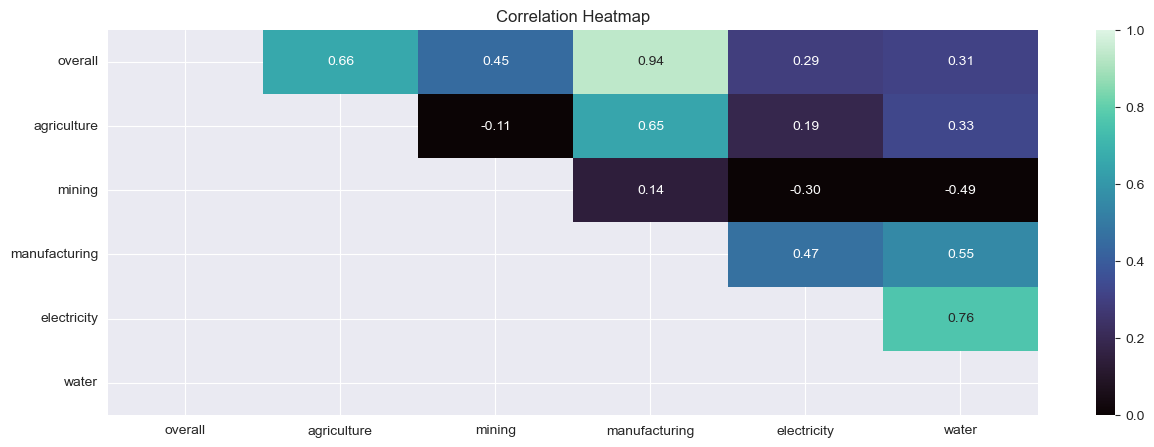

In [24]:
eda_ppi_3 = eda_ppi_2.copy()
eda_ppi_3 = eda_ppi_3.drop(columns = ['date'])

# Calculate the correlation matrix
correlation_matrix = eda_ppi_3.corr().round(3)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 5))

# Generate a mask that covers the lower triangle of the correlation matrix
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with an explicit format string for annotations
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="mako", fmt=".2f", vmax=1.0, vmin = 0.0, center=0.5)
plt.title('Correlation Heatmap')
plt.show()

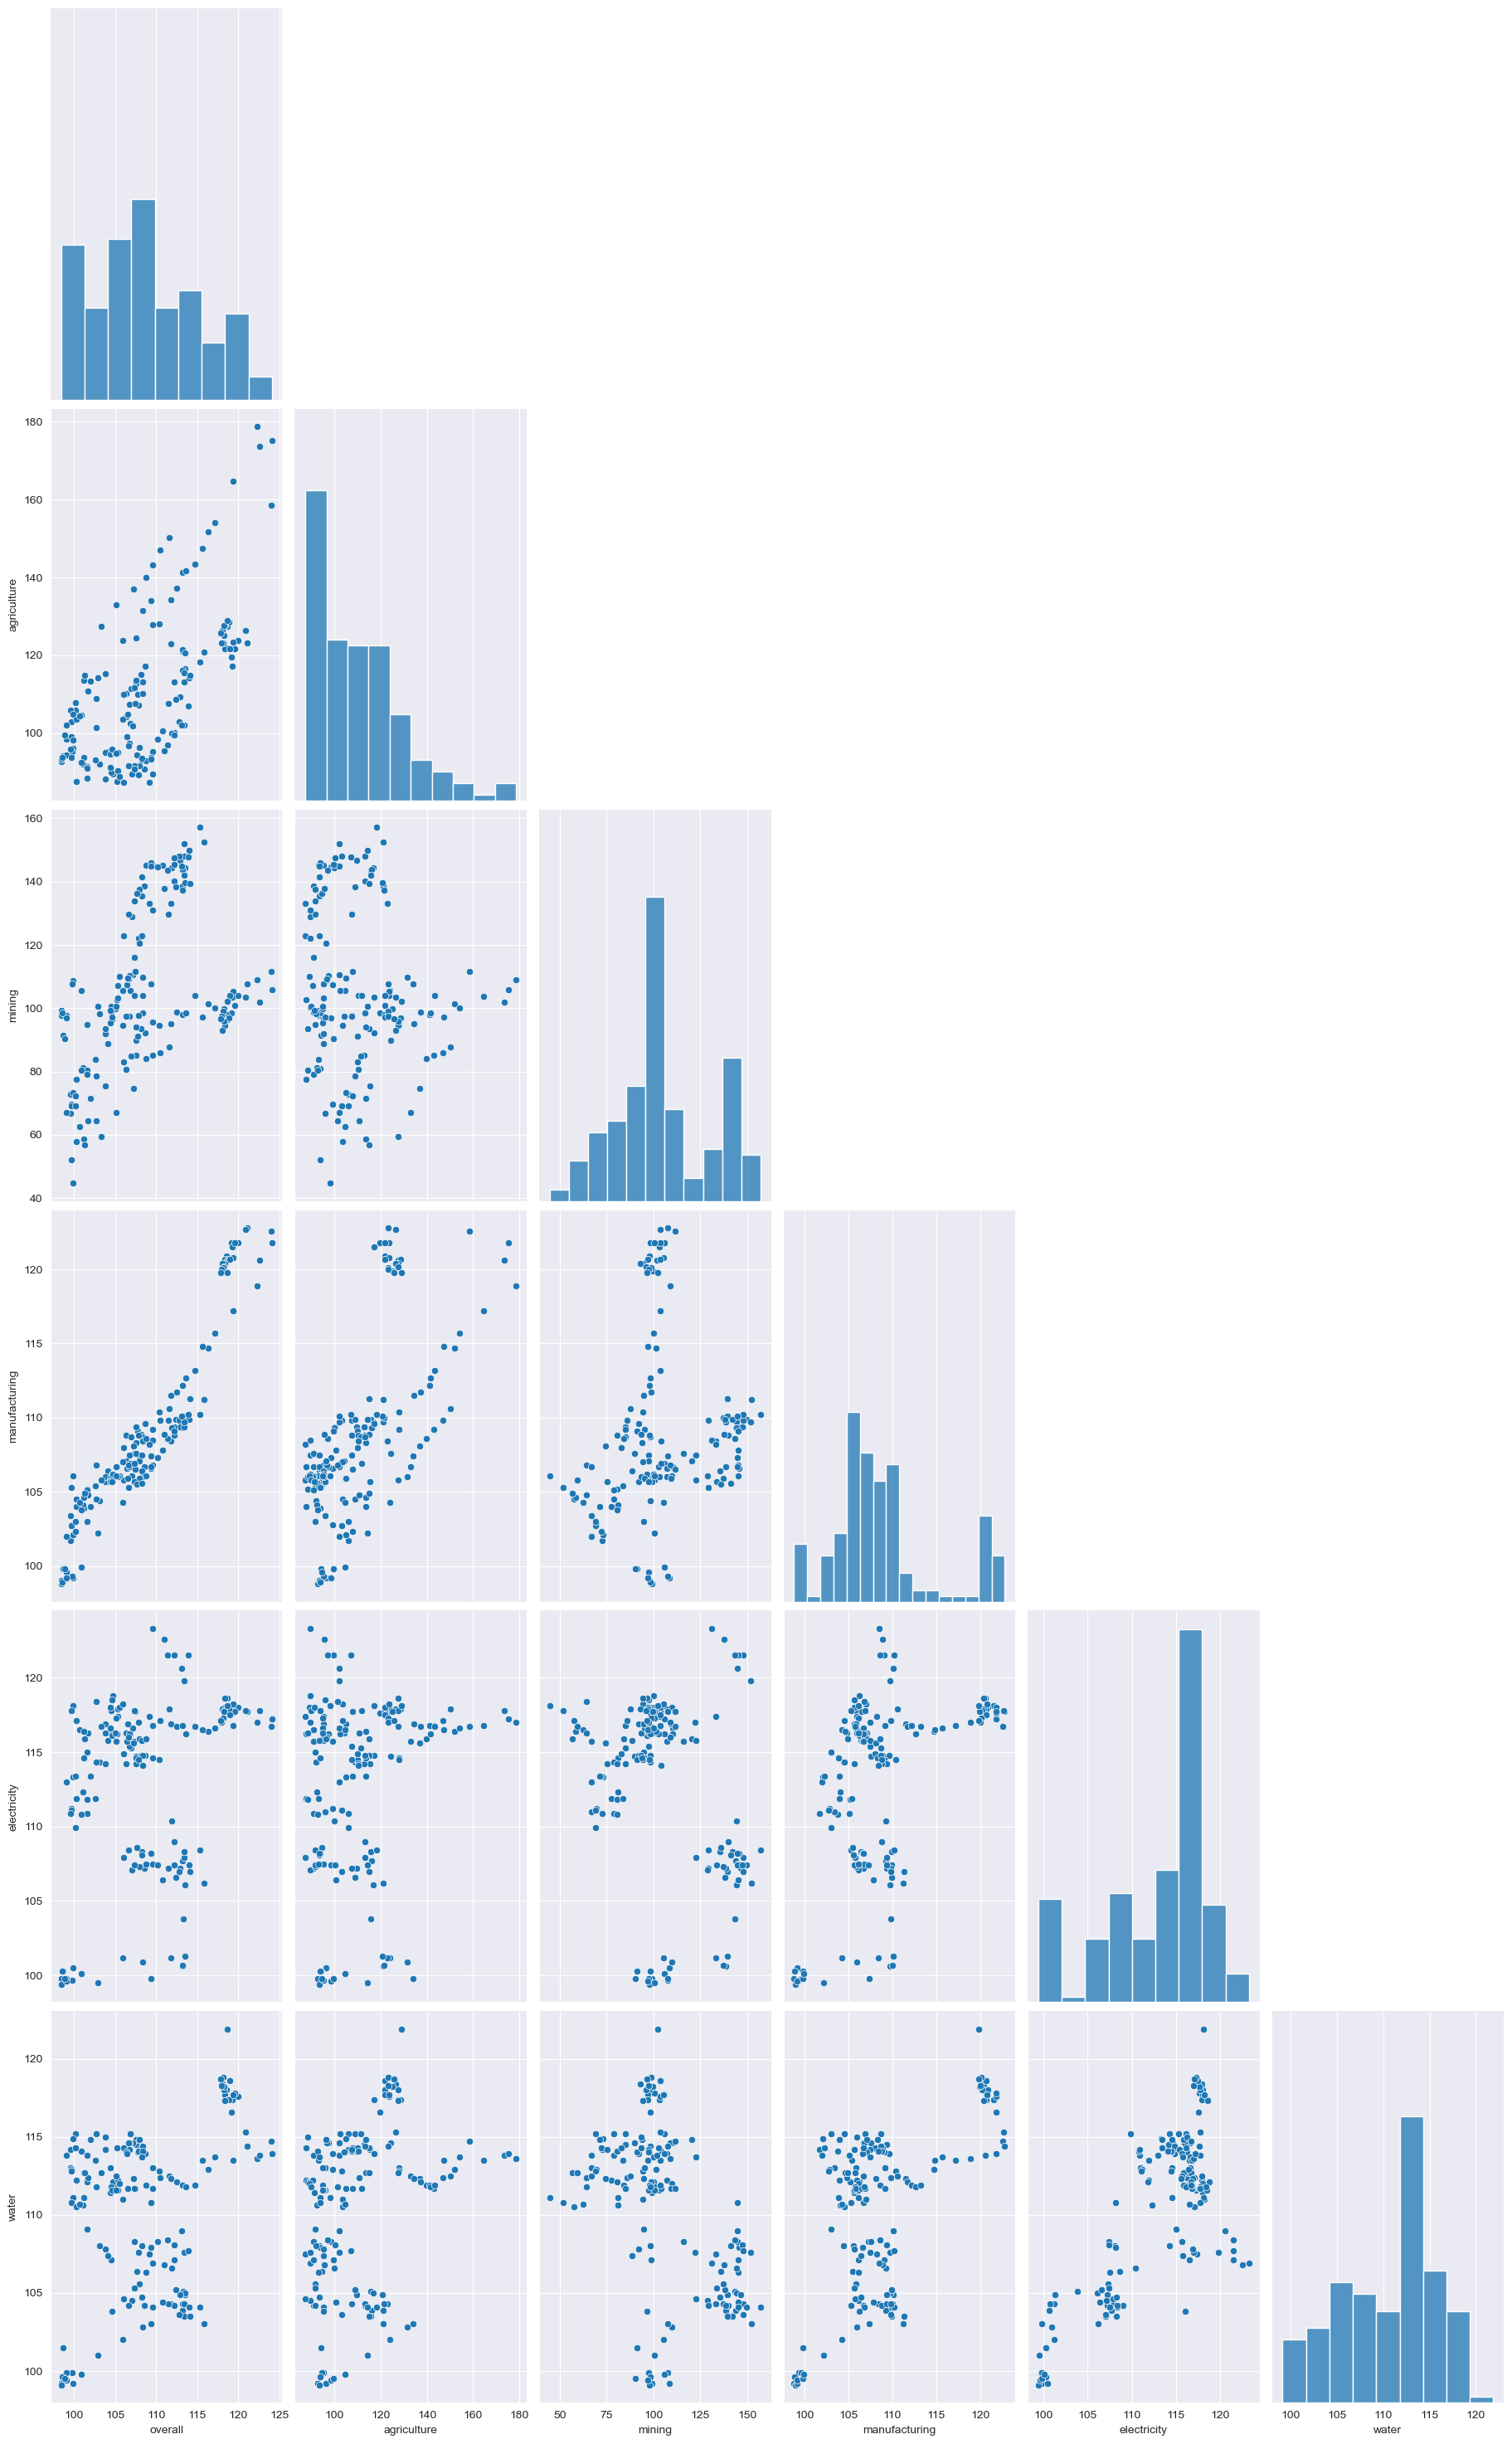

In [24]:
pairplot = sns.pairplot(eda_ppi, corner = True, height=5 , aspect=1/1.618)

In [26]:
# Assuming df is your DataFrame and 'column' is the column you're examining
Q1 = eda_ppi['agriculture'].quantile(0.25)
Q3 = eda_ppi['agriculture'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = eda_ppi[(eda_ppi['agriculture'] < lower_bound) | (eda_ppi['agriculture'] > upper_bound)] 
outliers

,date,overall,agriculture,mining,manufacturing,electricity,water
145,2022-02-01,119.4,164.6,103.8,117.2,116.8,113.5
146,2022-03-01,122.3,178.7,109.0,118.9,117.0,113.6
147,2022-04-01,122.6,173.6,101.8,120.6,117.8,113.8
148,2022-05-01,124.1,175.2,105.9,121.8,117.2,113.9


## Anomaly Detection on Time Series Producer Price Index (PPI) Data using Z-Score Method

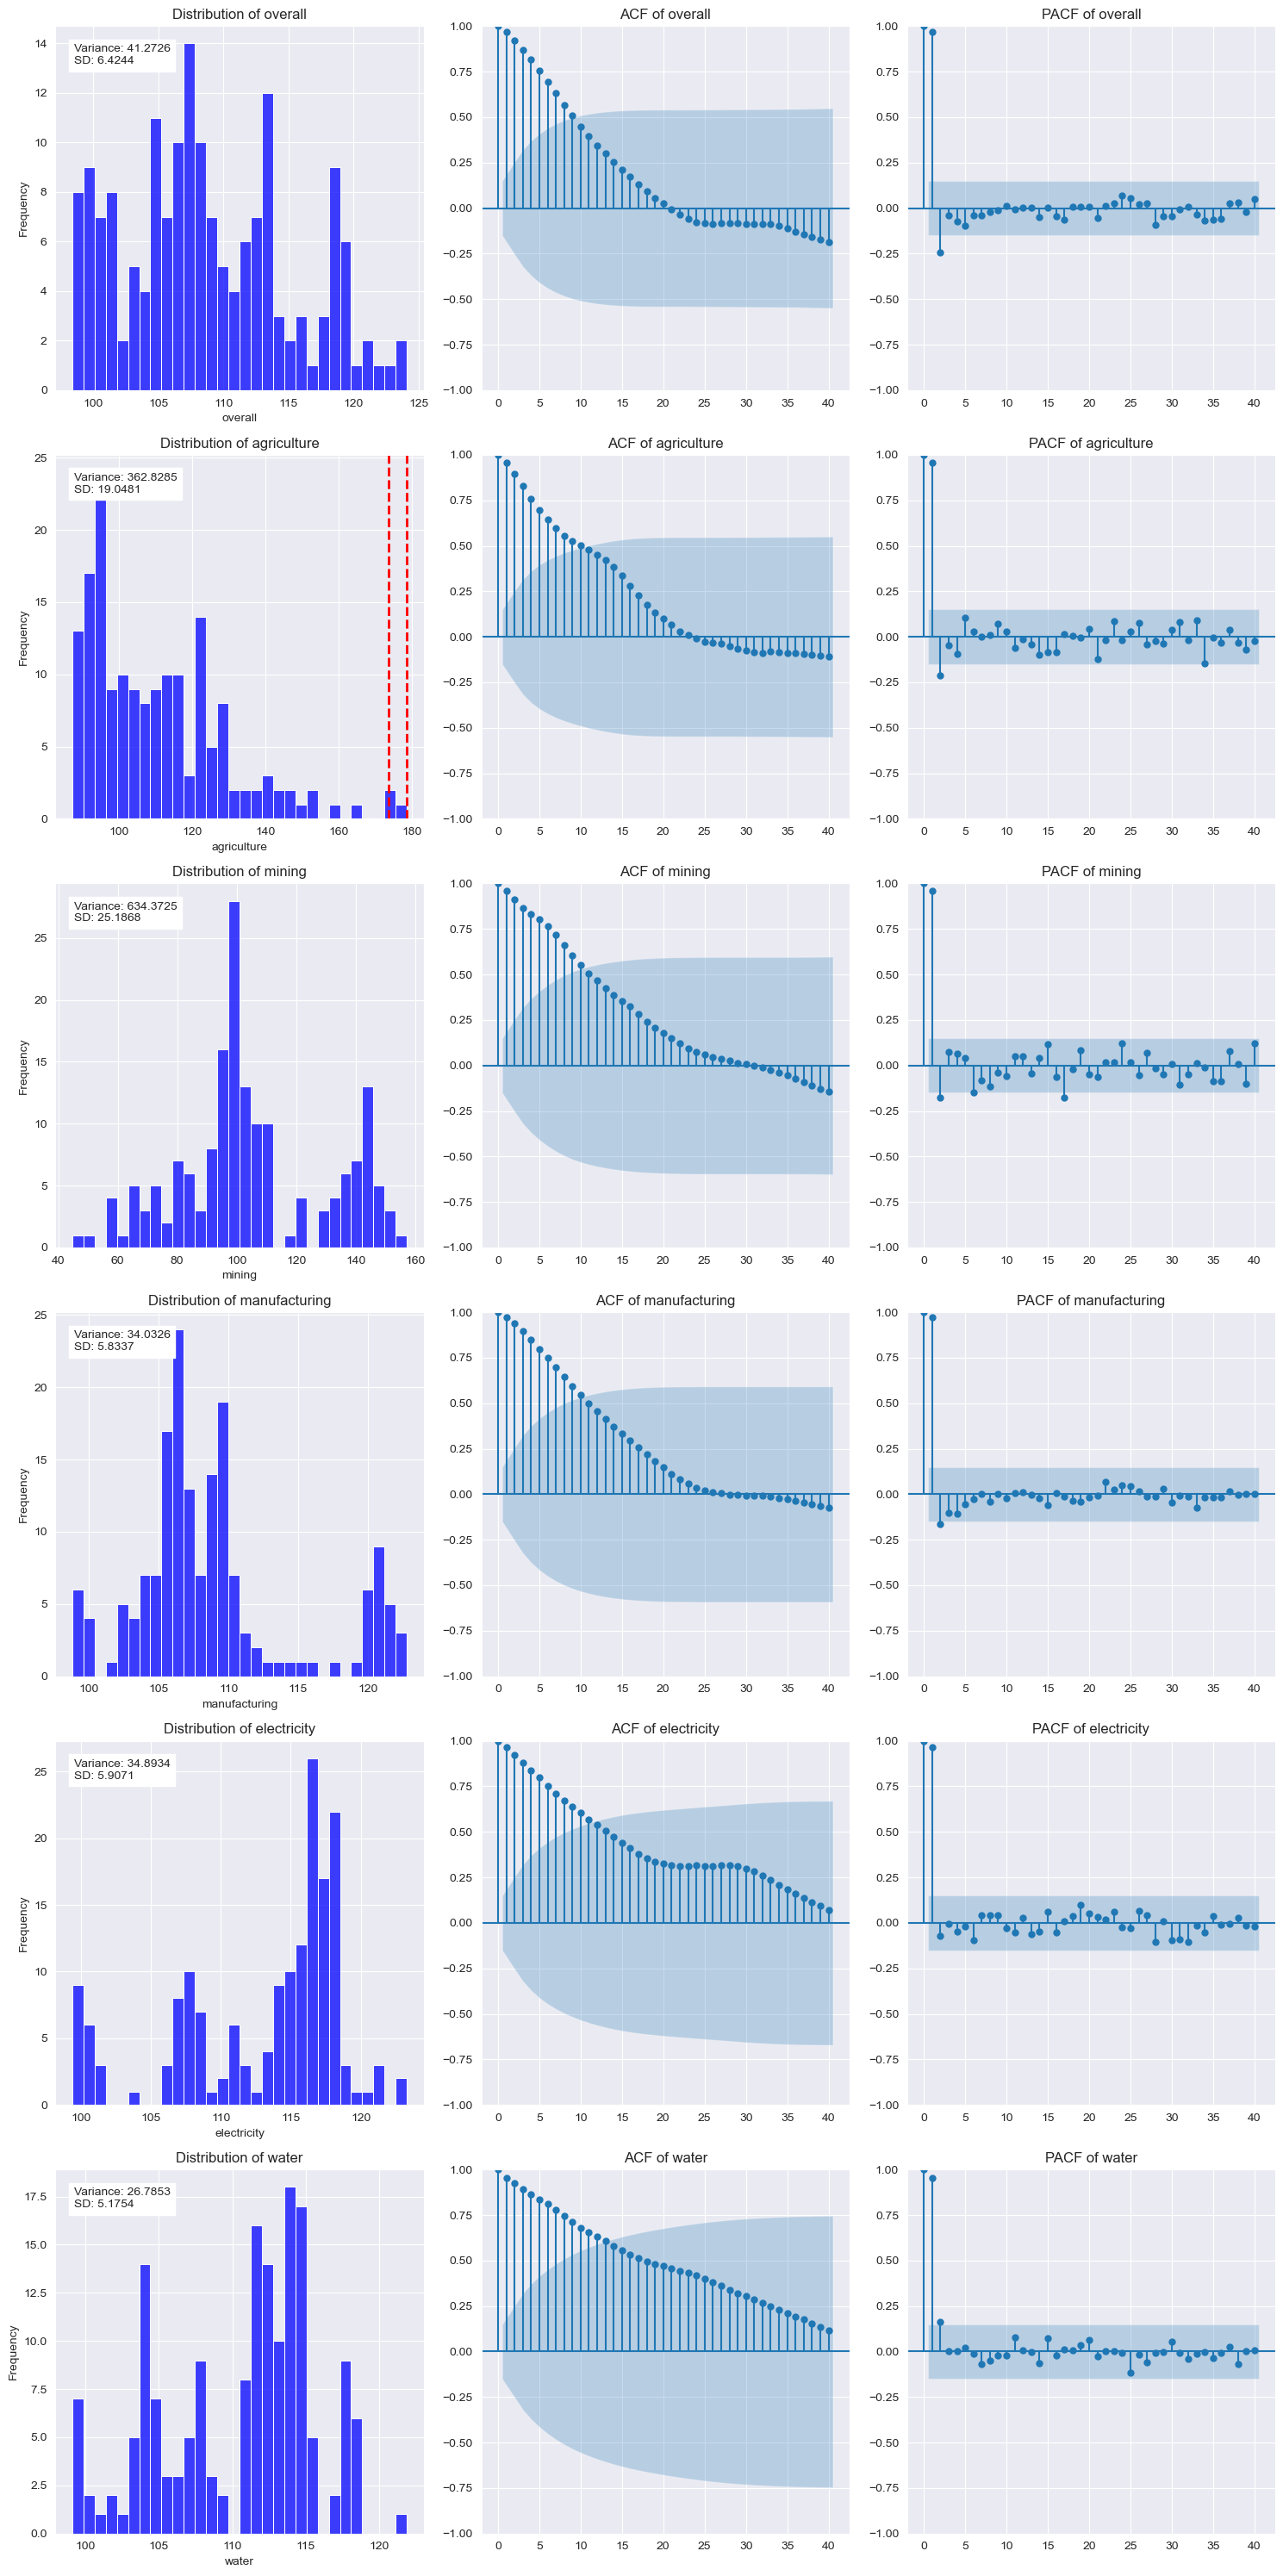

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def detect_and_plot_histograms_acf_pacf(df, columns, threshold=3):
    """
    Detects outliers in specified columns of a pandas DataFrame using the z-score method,
    plots histograms of the distributions, highlights the threshold for outliers,
    and plots ACF and PACF for each column. Annotates each histogram plot with the variance and standard deviation.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names to analyze.
    threshold (float): The z-score value to use as a threshold for identifying outliers.
    """
    num_columns = len(columns)
    nrows = num_columns  # One row per column now since we need more space for ACF and PACF
    ncols = 3            # One for histogram, one for ACF, and one for PACF

    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows), squeeze=False)

    for i, column in enumerate(columns):
        # Histogram
        ax_hist = axs[i, 0]

        # Calculate z-scores
        df['z_scores'] = stats.zscore(df[column].dropna())
        df['Outlier'] = np.abs(df['z_scores']) > threshold
        outliers = df[df['Outlier']]

        # Calculate variance and standard deviation
        variance = df[column].var(ddof=1)
        std_dev = df[column].std(ddof=1)

        # Plotting histogram
        sns.histplot(df[column], bins=30, kde=False, ax=ax_hist, color='blue')
        if not outliers.empty:
            ax_hist.axvline(x=outliers[column].min(), color='red', linestyle='dashed', linewidth=2)
            ax_hist.axvline(x=outliers[column].max(), color='red', linestyle='dashed', linewidth=2)

        ax_hist.set_title(f'Distribution of {column}')
        ax_hist.set_xlabel(column)
        ax_hist.set_ylabel('Frequency')

        # Annotate the histogram with variance and standard deviation
        ax_hist.annotate(f'Variance: {variance:.4f}\nSD: {std_dev:.4f}', xy=(0.05, 0.95), xycoords='axes fraction',
                         horizontalalignment='left', verticalalignment='top', fontsize=10, backgroundcolor='white')

        # ACF Plot
        ax_acf = axs[i, 1]
        plot_acf(df[column].dropna(), ax=ax_acf, lags=40)
        ax_acf.set_title(f'ACF of {column}')

        # PACF Plot
        ax_pacf = axs[i, 2]
        plot_pacf(df[column].dropna(), ax=ax_pacf, lags=40)
        ax_pacf.set_title(f'PACF of {column}')

        # Remove temporary columns for z-scores and outliers
        df.drop(columns=['z_scores', 'Outlier'], inplace=True)

    plt.tight_layout()
    plt.show()

# Usage example:
columns_to_check = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']
detect_and_plot_histograms_acf_pacf(eda_ppi_3, columns_to_check)

## Anomaly Detection on Time Series Producer Price Index (PPI) Data using Median Absolute Deviation (MAD) Method
This is more applicable since the data is not normally distributed.

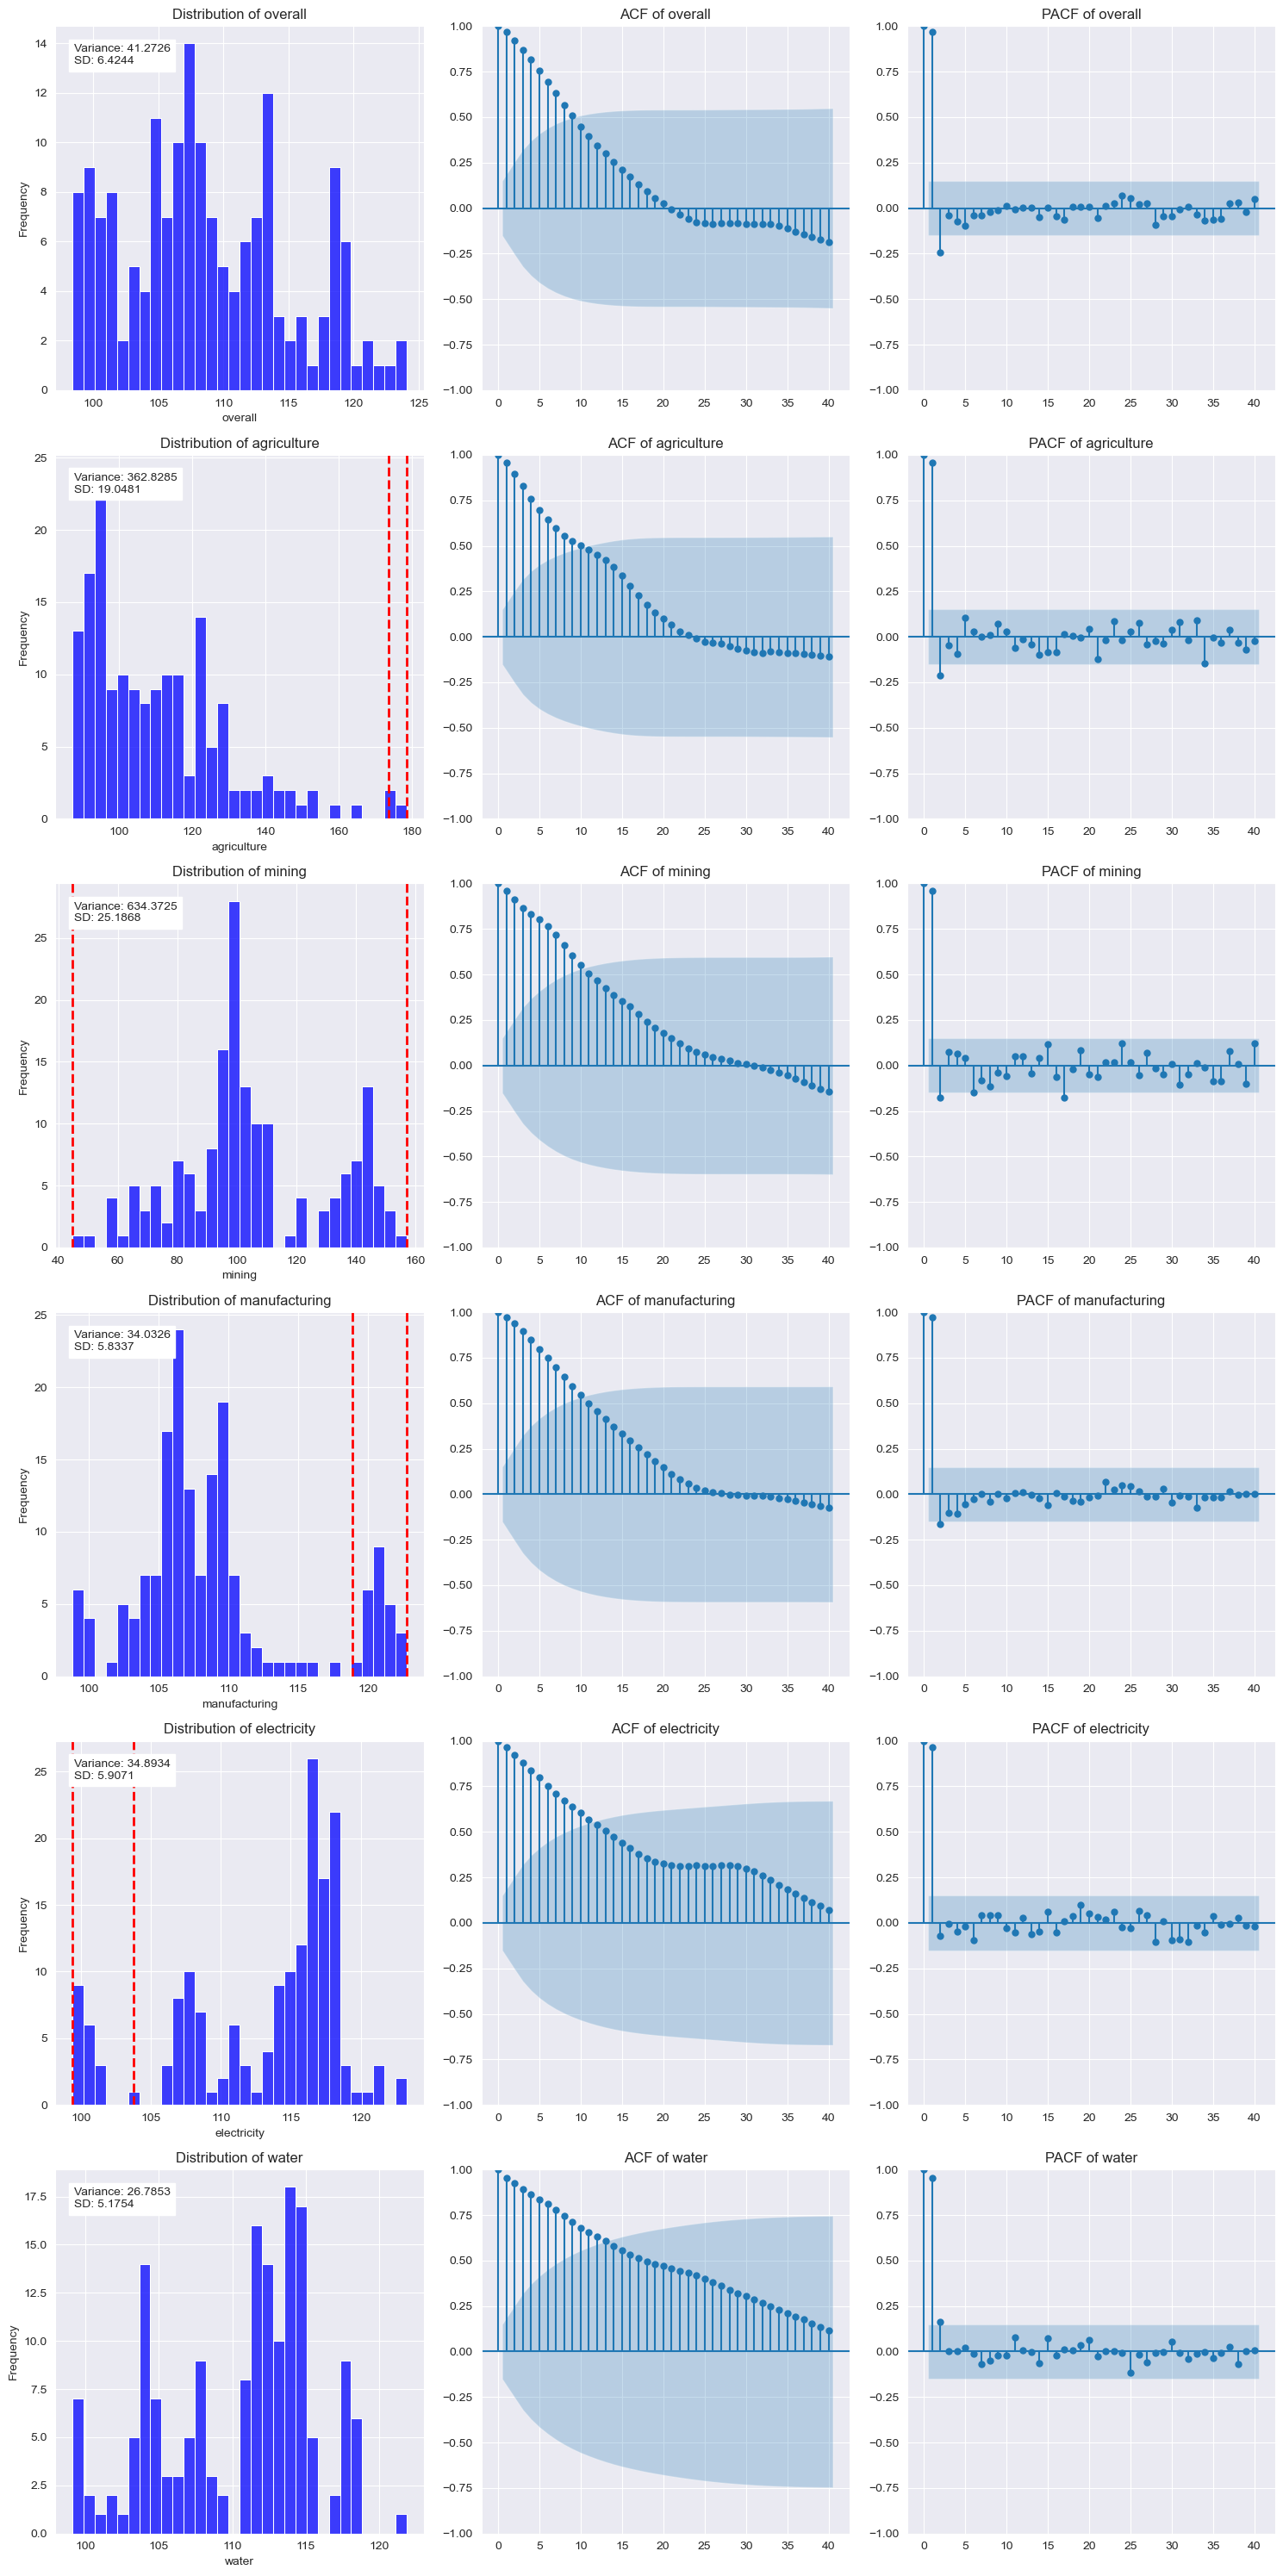

In [30]:
from scipy import stats

def detect_and_plot_histograms_acf_pacf(df, columns, threshold=3):
    """
    Detects outliers in specified columns of a pandas DataFrame using the Median Absolute Deviation (MAD) method,
    plots histograms of the distributions, highlights the threshold for outliers,
    and plots ACF and PACF for each column. Annotates each histogram plot with the variance and standard deviation.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names to analyze.
    threshold (float): The MAD value to use as a threshold for identifying outliers.
    """
    num_columns = len(columns)
    nrows = num_columns  # One row per column now since we need more space for ACF and PACF
    ncols = 3            # One for histogram, one for ACF, and one for PACF

    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows), squeeze=False)

    for i, column in enumerate(columns):
        # Histogram
        ax_hist = axs[i, 0]

        # Calculate MAD and modify the threshold accordingly
        median = df[column].median()
        mad = stats.median_abs_deviation(df[column].dropna())
        df['MAD_Scores'] = df[column].apply(lambda x: 0.6745 * (x - median) / mad)
        df['Outlier'] = np.abs(df['MAD_Scores']) > threshold
        outliers = df[df['Outlier']]

        # Calculate variance and standard deviation
        variance = df[column].var(ddof=1)
        std_dev = df[column].std(ddof=1)

        # Plotting histogram
        sns.histplot(df[column], bins=30, kde=False, ax=ax_hist, color='blue')
        if not outliers.empty:
            ax_hist.axvline(x=outliers[column].min(), color='red', linestyle='dashed', linewidth=2)
            ax_hist.axvline(x=outliers[column].max(), color='red', linestyle='dashed', linewidth=2)

        ax_hist.set_title(f'Distribution of {column}')
        ax_hist.set_xlabel(column)
        ax_hist.set_ylabel('Frequency')

        # Annotate the histogram with variance and standard deviation
        ax_hist.annotate(f'Variance: {variance:.4f}\nSD: {std_dev:.4f}', xy=(0.05, 0.95), xycoords='axes fraction',
                         horizontalalignment='left', verticalalignment='top', fontsize=10, backgroundcolor='white')

        # ACF Plot
        ax_acf = axs[i, 1]
        plot_acf(df[column].dropna(), ax=ax_acf, lags=40)
        ax_acf.set_title(f'ACF of {column}')

        # PACF Plot
        ax_pacf = axs[i, 2]
        plot_pacf(df[column].dropna(), ax=ax_pacf, lags=40)
        ax_pacf.set_title(f'PACF of {column}')

        # Remove temporary columns for MAD scores and outliers
        df.drop(columns=['MAD_Scores', 'Outlier'], inplace=True)

    plt.tight_layout()
    plt.show()

# Usage example:
columns_to_check = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']
detect_and_plot_histograms_acf_pacf(eda_ppi_3, columns_to_check)

ValueError: window must be an integer 0 or greater

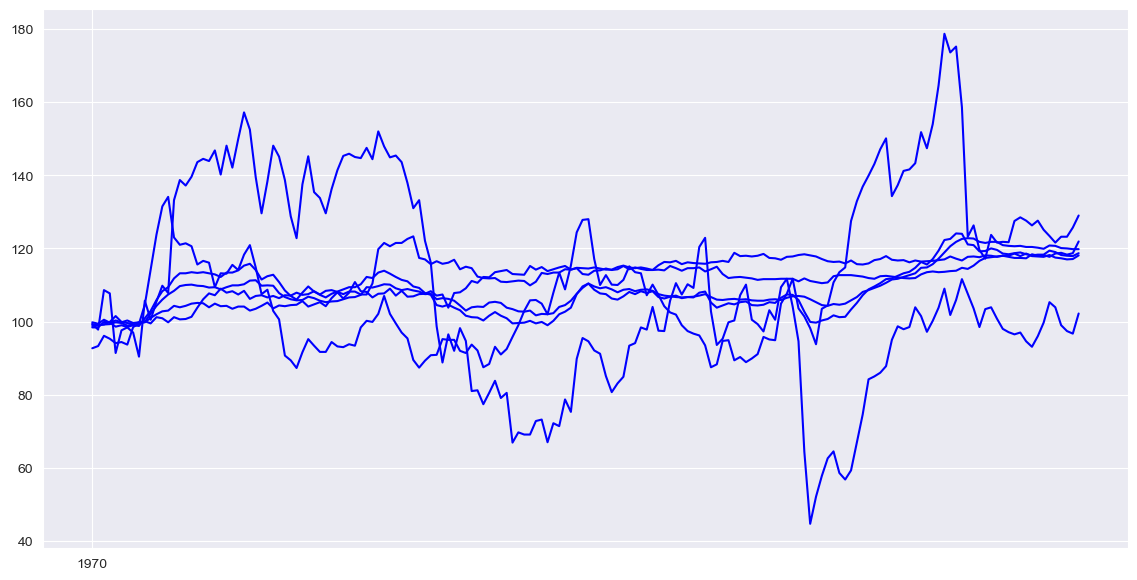

In [35]:
def detect_anomalies(data, window=10, z_threshold=2):
    """
    Detects anomalies in a time series dataset and visualizes them.
    
    Parameters:
        data (pd.Series): Time series data.
        window (int): Rolling window size for mean and std deviation.
        z_threshold (int): Z-score threshold to identify anomalies.
    
    Returns:
        A matplotlib plot showing the time series and anomalies.
    """
    # Ensure the index is datetime
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)
    
    # Plotting the original data
    plt.figure(figsize=(14, 7))
    plt.plot(data, label='Original Data', color='blue')
    
    # Calculating rolling mean and standard deviation
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    
    # Calculating Z-scores
    anomalies = (data - rolling_mean) / rolling_std
    anomalies = anomalies[abs(anomalies) > z_threshold]
    
    # Highlighting anomalies
    plt.scatter(anomalies.index, data[anomalies.index], color='red', label='Anomalies')
    
    plt.title('Time Series Anomaly Detection')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
columns_to_check = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']
# Assuming 'df' is your DataFrame and 'value_column' is your time series column:
detect_anomalies(eda_ppi_3, columns_to_check)


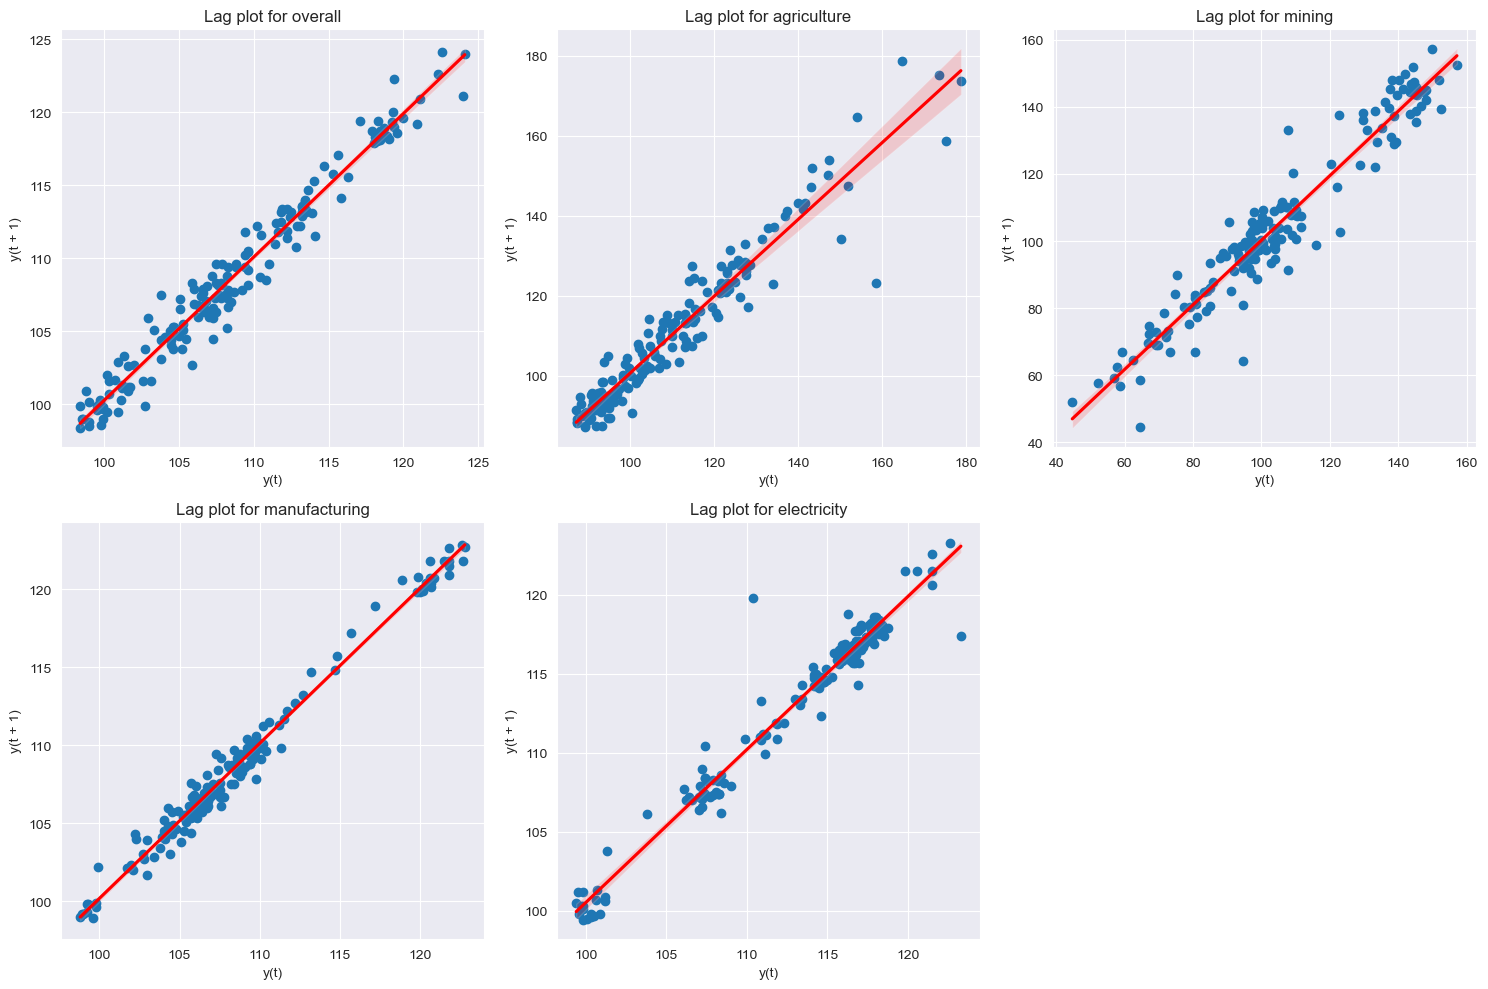

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns

# Assuming eda_ppi is your DataFrame
columns = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity']

# Define the number of rows and columns for the subplots
nrows = 2
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

# Flatten the array of axes so we can easily iterate over it
axs = axs.flatten()

for ax, column in zip(axs, columns):
    # Create lag plot
    lag_plot(eda_ppi[column], ax=ax)
    
    # Add linear fit using seaborn's regplot
    sns.regplot(x=eda_ppi[column].dropna().values[:-1], y=eda_ppi[column].dropna().values[1:], ax=ax, scatter=False, color='red')
    
    ax.set_title(f'Lag plot for {column}')

# Remove extra subplots
for i in range(len(columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

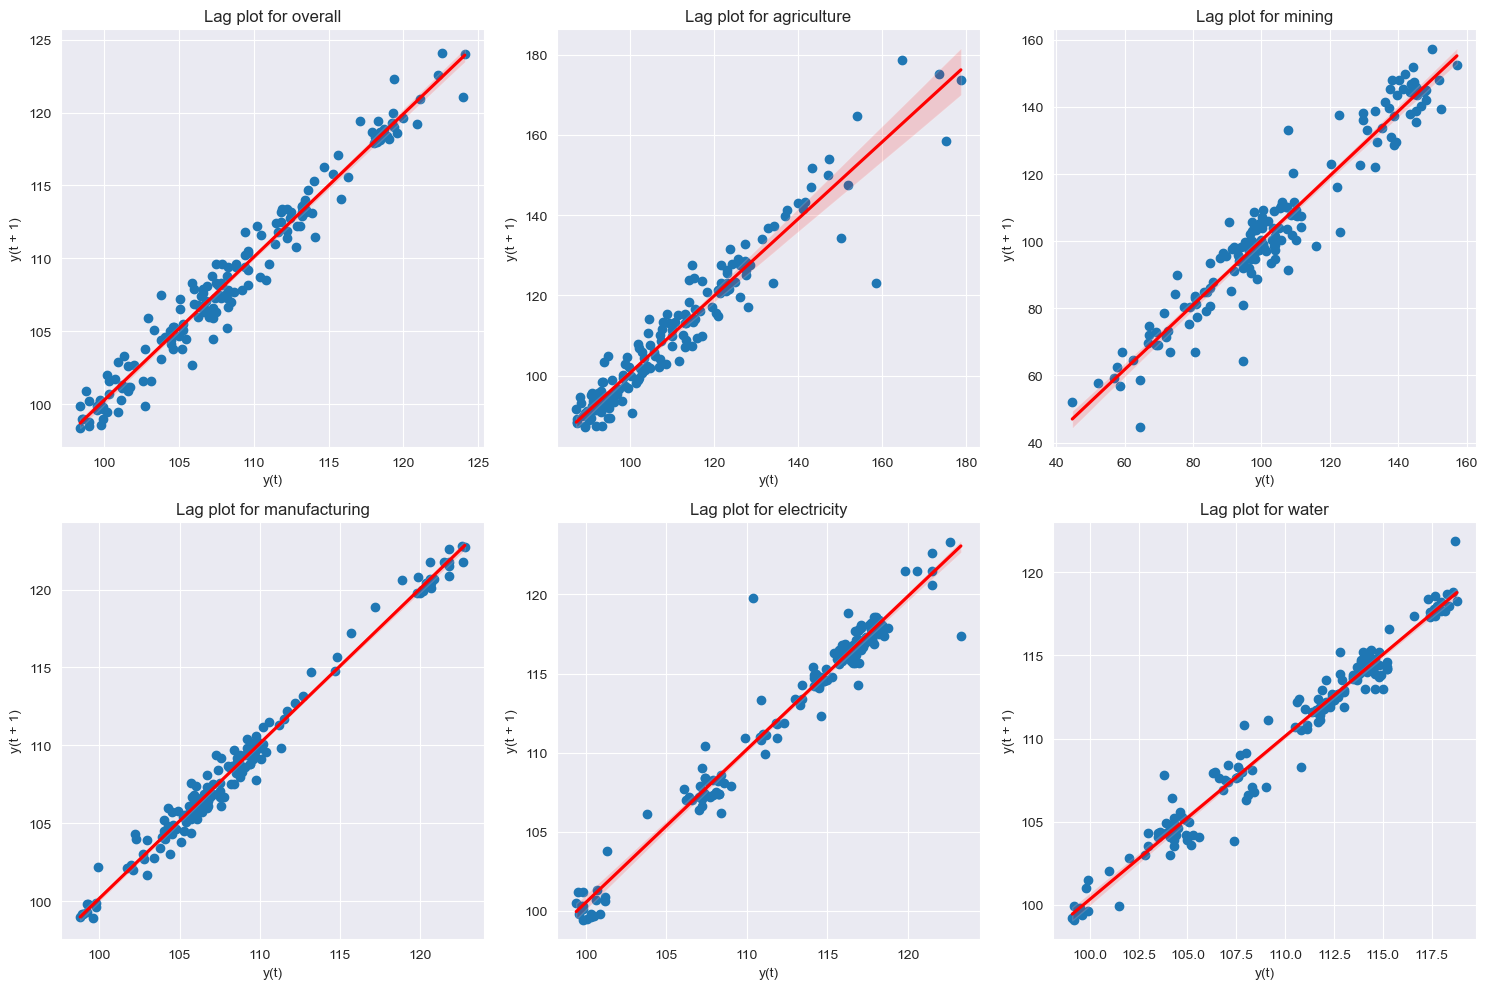

In [36]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
import numpy as np

def regression_lagplot(dataframe, columns):
    """
    Generates lag plots with linear regression fit lines for specified columns in a DataFrame.

    Args:
    dataframe (DataFrame): The pandas DataFrame containing the data.
    columns (list): A list of column names to generate the plots for.

    Example usage:
    columns_to_check = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']
    regression_lagplot(df, columns_to_check)
    """
    # Calculate the number of subplots needed
    ncols = 3
    nrows = int(np.ceil(len(columns) / ncols))

    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axs = axs.flatten()  # Flatten the array of axes

    for ax, column in zip(axs, columns):
        if column in dataframe.columns:
            # Create lag plot
            lag_plot(dataframe[column], ax=ax)
            
            # Add linear fit using seaborn's regplot
            sns.regplot(x=dataframe[column].dropna().values[:-1],
                        y=dataframe[column].dropna().values[1:],
                        ax=ax, scatter=False, color='red')
            
            ax.set_title(f'Lag plot for {column}')
        else:
            ax.set_visible(False)  # Hide axes if the column does not exist

    # Hide any unused subplots
    for i in range(len(columns), len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage:
# columns_to_check = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity', 'water']
# regression_lagplot(eda_ppi_3, columns_to_check)

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(eda_ppi_3)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [56]:
eda_ppi_2.head()

,date,overall,agriculture,mining,manufacturing,electricity,water
0,2010-01-01,98.4,92.7,99.4,98.8,99.8,99.2
1,2010-02-01,98.4,93.3,97.8,99.0,99.4,99.1
2,2010-03-01,99.9,96.1,108.6,99.2,100.5,99.2
3,2010-04-01,99.8,95.3,107.7,99.3,99.7,99.9
4,2010-05-01,98.6,94.1,91.4,99.8,100.3,101.5


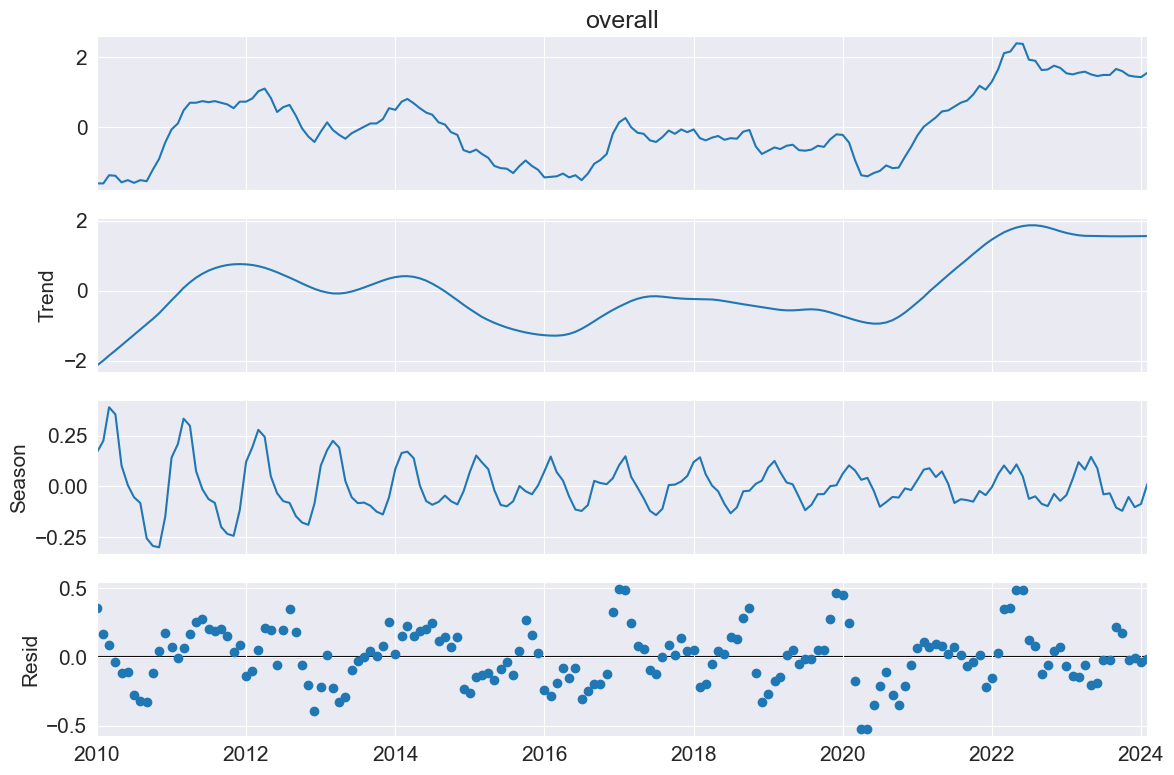

In [109]:
from statsmodels.tsa.seasonal import STL
import pandas as pd

# Check if the DataFrame exists
if 'eda_ppi_2' in locals() or 'eda_ppi_2' in globals():
    # Check if the column exists in the DataFrame
    if 'overall' in eda_ppi_3.columns:
        # Check if the column contains NaN values
        if eda_ppi_2['overall'].isna().sum() > 0:
            print("The column contains NaN values. Please handle them before applying the STL function.")
        else:
            # Check if the column is a time series with a DatetimeIndex
            if isinstance(eda_ppi_2.index, pd.DatetimeIndex):
                # Decompose the time series
                stl = STL(eda_ppi_2['overall'], seasonal=13)  # Adjust the seasonal parameter as needed
                result = stl.fit()

                # Plot the decomposed components
                result.plot()
                plt.show()

                # Extract the residual component
                residuals = result.resid
            else:
                print("The index of the DataFrame is not a DatetimeIndex. Please convert it to a DatetimeIndex.")
    else:
        print("The column 'overall' does not exist in the DataFrame.")
else:
    print("The DataFrame 'eda_ppi_2' does not exist.")

In [78]:
eda_ppi_3.head()

,overall,agriculture,mining,manufacturing,electricity,water,dbscan_outlier,iso_forest_outlier
0,98.4,92.7,99.4,98.8,99.8,99.2,False,False
1,98.4,93.3,97.8,99.0,99.4,99.1,False,False
2,99.9,96.1,108.6,99.2,100.5,99.2,False,False
3,99.8,95.3,107.7,99.3,99.7,99.9,False,False
4,98.6,94.1,91.4,99.8,100.3,101.5,False,False


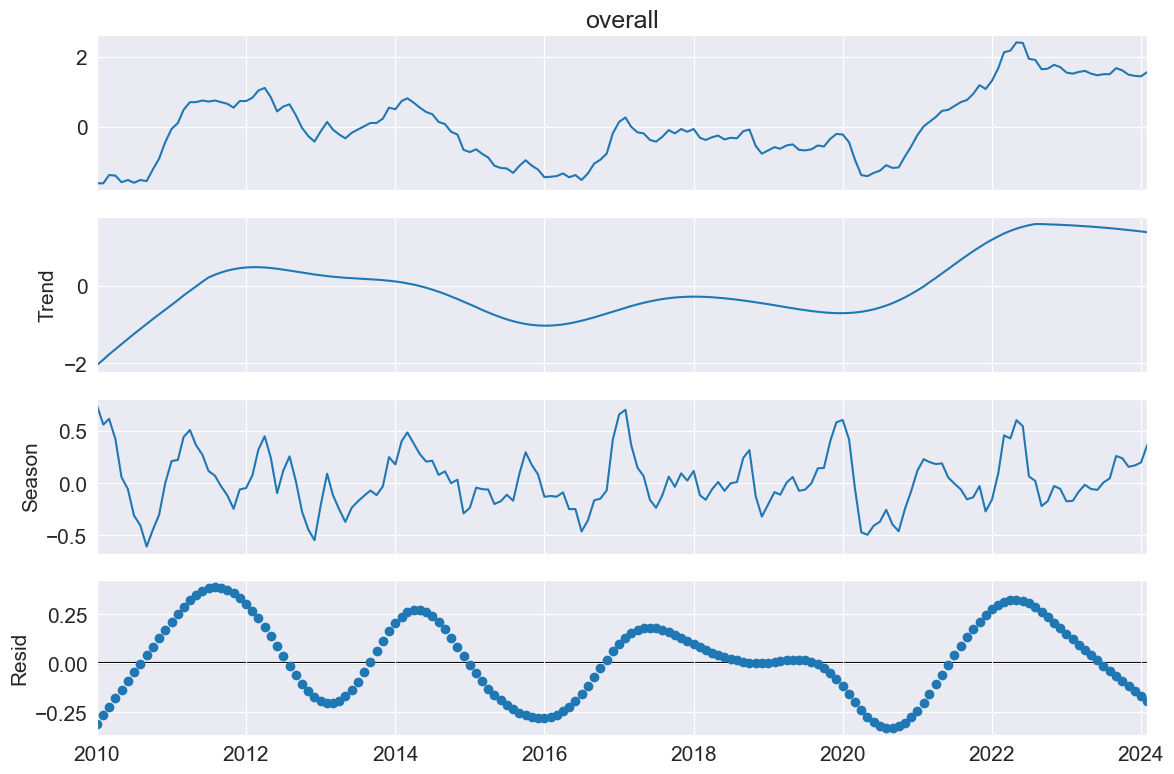

In [92]:
from statsmodels.tsa.seasonal import STL
import pandas as pd
import matplotlib.pyplot as plt

def decompose_time_series(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name in df.columns:
        # Check if the column contains NaN values
        if df[column_name].isna().sum() > 0:
            print(f"The column {column_name} contains NaN values. Please handle them before applying the STL decomposition.")
        else:
            # Check if the DataFrame's index is a DatetimeIndex
            if isinstance(df.index, pd.DatetimeIndex):
                # Decompose the time series
                stl = STL(df[column_name], seasonal=3)  # Adjust the seasonal parameter as needed
                result = stl.fit()

                # Plot the decomposed components
                result.plot()
                plt.show()

                # Optionally return the decomposition results if needed
                return result
            else:
                print("The index of the DataFrame is not a DatetimeIndex. Please convert it to a DatetimeIndex.")
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")

# Example usage:
# Assuming 'eda_ppi_2' is a DataFrame and 'overall' is a column in that DataFrame
decompose_time_series(eda_ppi_2, 'overall')


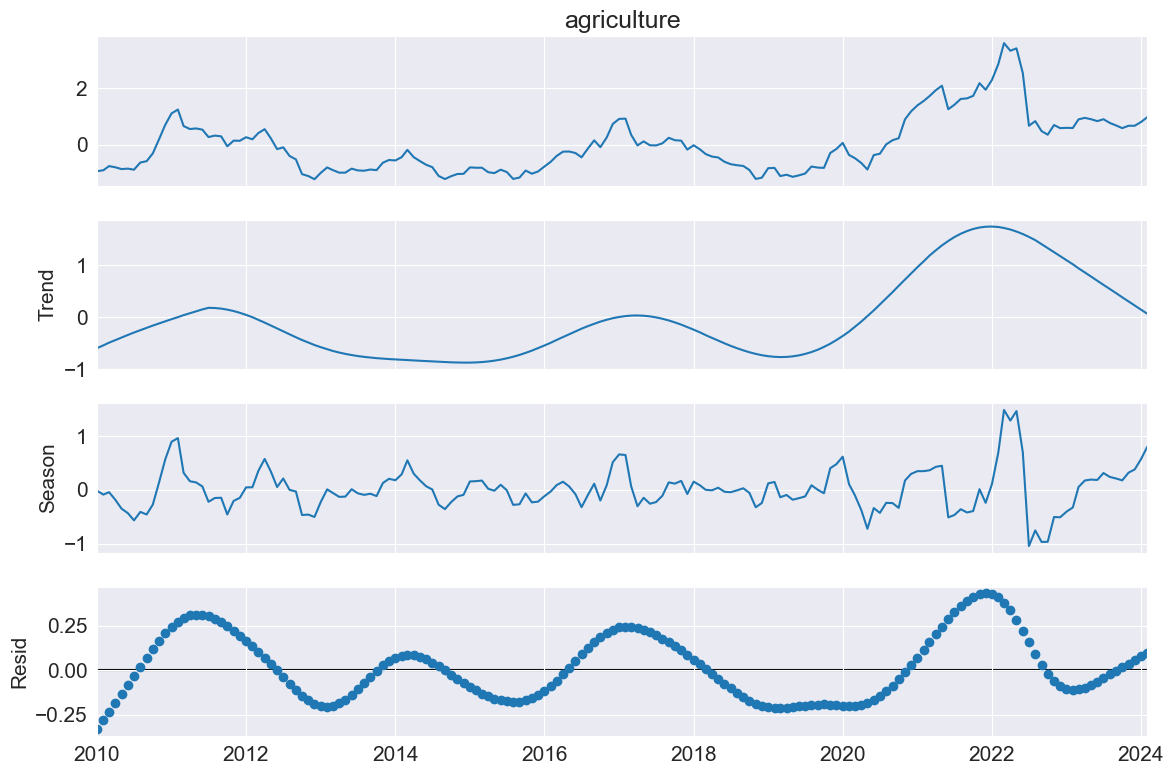

In [85]:
decompose_time_series(eda_ppi_2, 'agriculture')


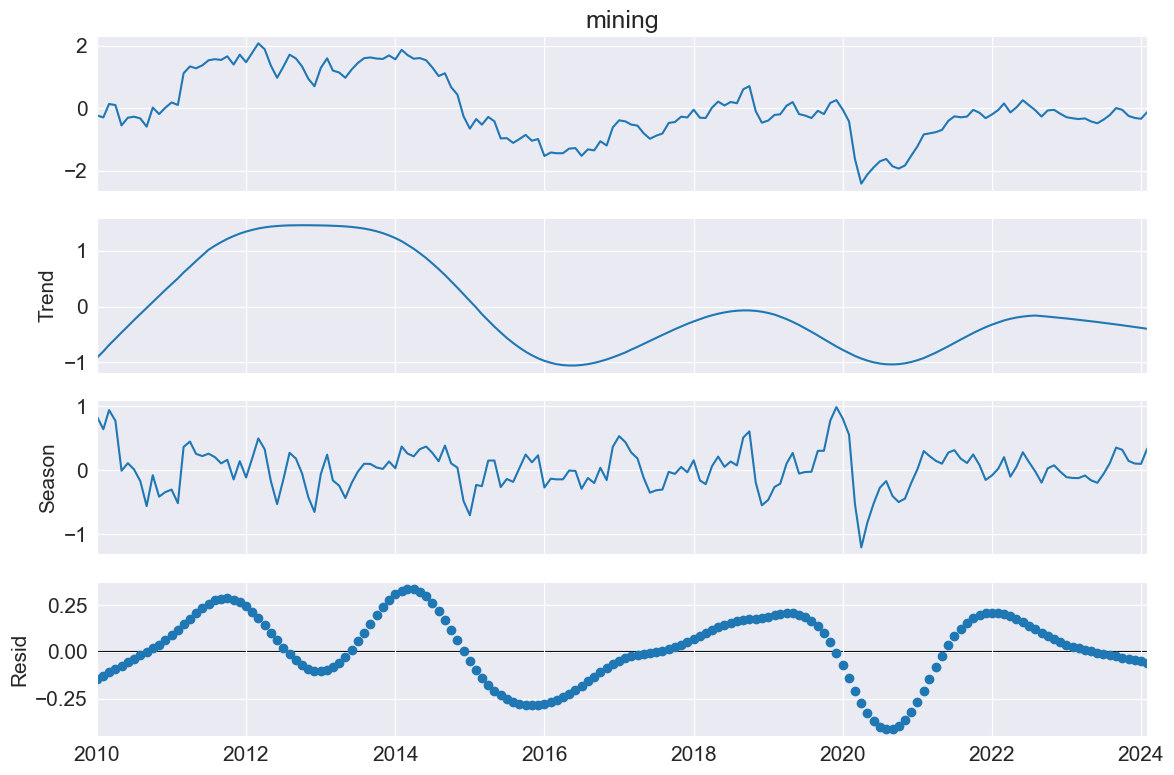

In [86]:
decompose_time_series(eda_ppi_2, 'mining')

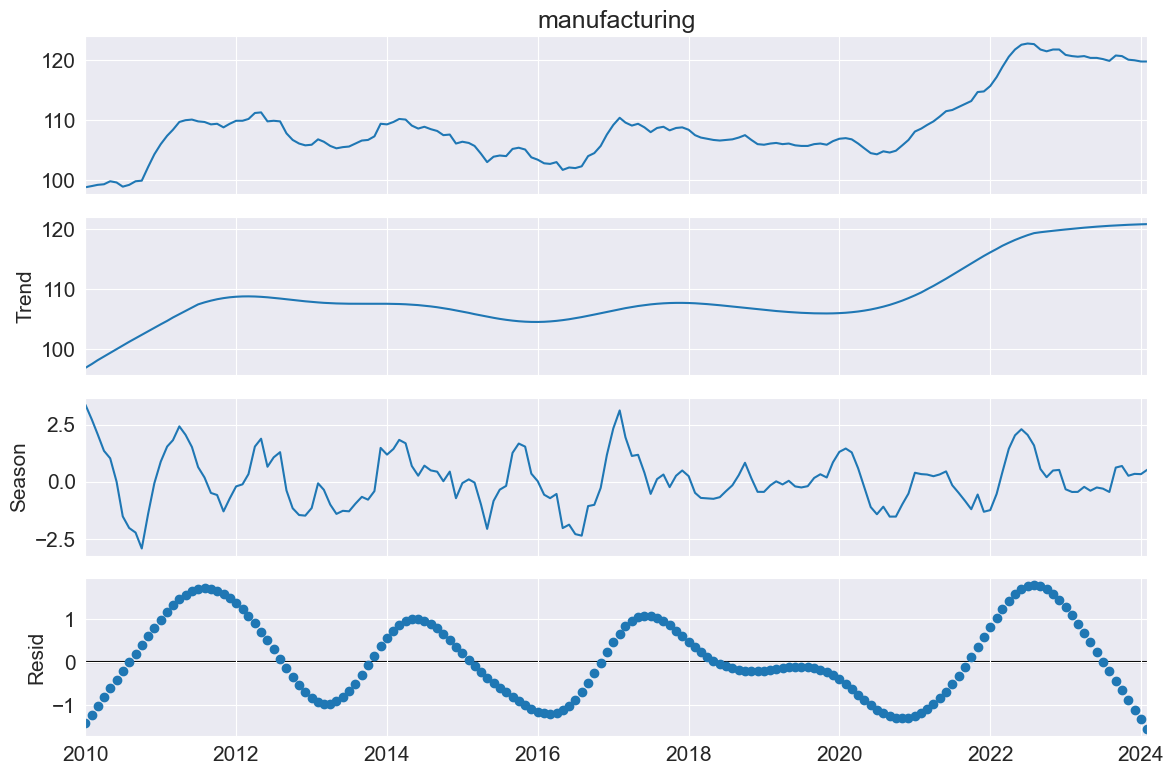

In [87]:
decompose_time_series(eda_ppi_2, 'manufacturing')

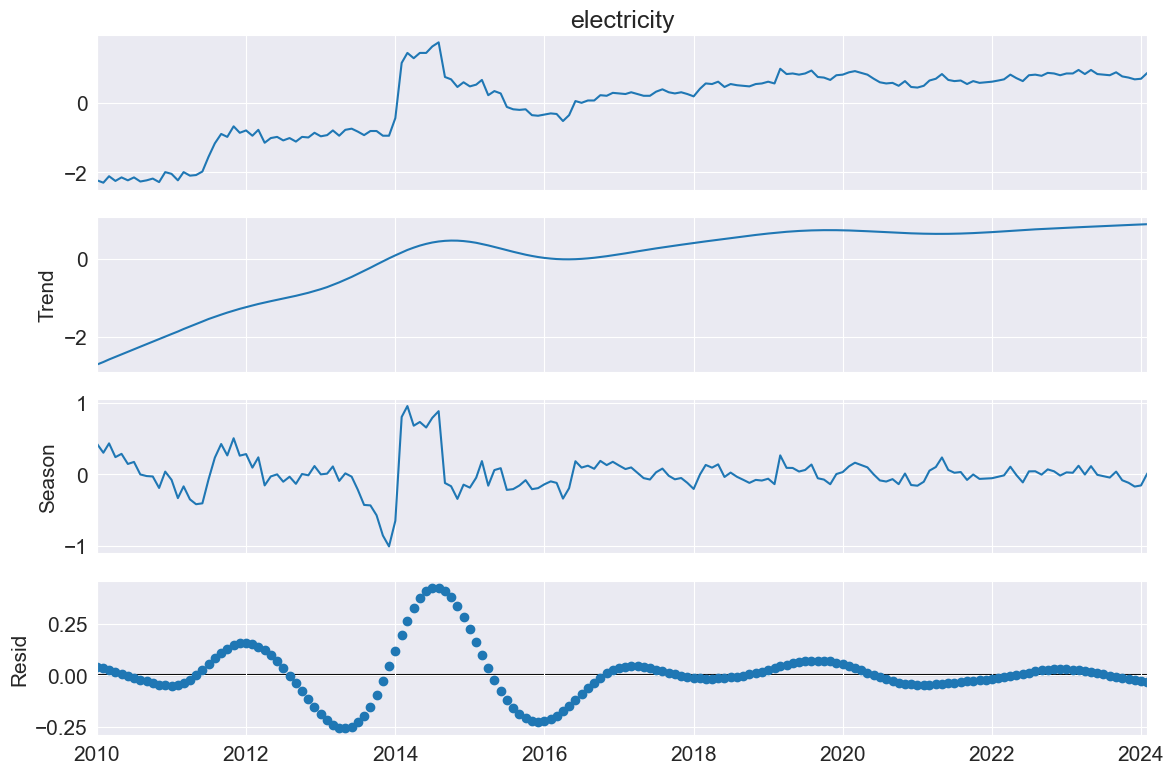

In [88]:
decompose_time_series(eda_ppi_2, 'electricity')

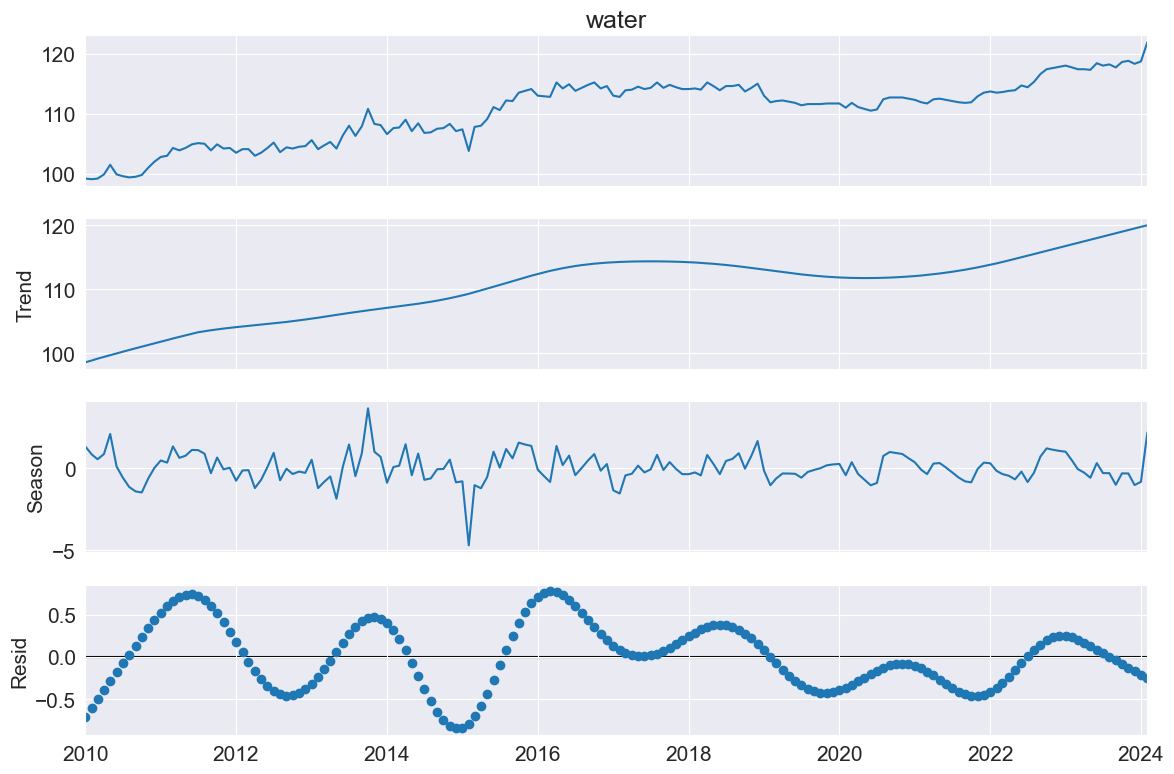

In [89]:
decompose_time_series(eda_ppi_2, 'water')

In [39]:
# Example: print the outliers detected by DBSCAN and Isolation Forest
print("Outliers detected by DBSCAN:")
outliers_dbscan


Outliers detected by DBSCAN:


,overall,agriculture,mining,manufacturing,electricity,water,dbscan_outlier,iso_forest_outlier
9,100.9,104.6,105.7,99.9,100.1,99.8,True,False
10,102.9,114.2,100.5,102.2,99.5,101.0,True,True
11,105.9,123.8,105.5,104.3,101.2,102.0,True,False
12,108.3,131.5,109.8,106.0,100.9,102.8,True,False
13,109.4,134.1,107.8,107.4,99.8,103.0,True,False
...,...,...,...,...,...,...,...,...
148,124.1,175.2,105.9,121.8,117.2,113.9,True,False
149,124.0,158.6,111.6,122.6,116.7,114.7,True,True
150,121.1,123.2,107.6,122.8,117.7,114.4,True,False
151,120.9,126.3,103.6,122.7,117.8,115.3,True,False


In [40]:
print("\nOutliers detected by Isolation Forest:")
outliers_iso_forest


Outliers detected by Isolation Forest:


,overall,agriculture,mining,manufacturing,electricity,water,dbscan_outlier,iso_forest_outlier
10,102.9,114.2,100.5,102.2,99.5,101.0,True,True
149,124.0,158.6,111.6,122.6,116.7,114.7,True,True


ValueError: Length of DatetimeIndex vectors must match length of `data` when both are used, but `data` has length 54 and the vector passed to `x` has length 170.

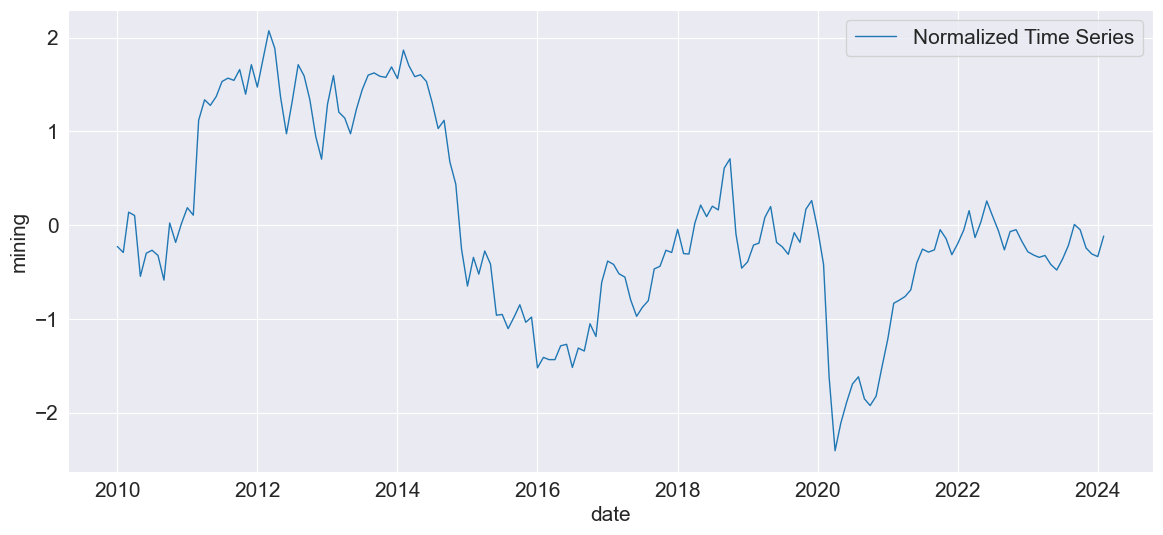

In [70]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'eda_ppi_2' is your dataframe and 'date' is the date column
# 1. Transform 'date' column into a datetime index for time series analytics
#eda_ppi_2['date'] = pd.to_datetime(eda_ppi_2['date'])
#eda_ppi_2.set_index('date', inplace=True)

# Select a numeric column for analysis, let's assume the column is named 'value'
numeric_column = 'mining'  # Replace with your actual numeric column name)
# Assuming eda_ppi is your DataFrame
# columns = ['overall', 'agriculture', 'mining', 'manufacturing', 'electricity']


# 2. Normalize the dataset
scaler = StandardScaler()
eda_ppi_2[numeric_column] = scaler.fit_transform(eda_ppi_2[[numeric_column]])

# 3. Decompose the time series using STL
stl = STL(eda_ppi_2[numeric_column], seasonal=3)  # Adjust the seasonal period if necessary
result = stl.fit()

# 4. Apply Isolation Forest to the residuals
iso_forest = IsolationForest(n_estimators=170, contamination='auto', random_state=42)
eda_ppi_2['anomaly_scores'] = iso_forest.fit_predict(result.resid.values.reshape(-1, 1))

# 5. Plot out the anomalies using seaborn and matplotlib
plt.figure(figsize=(14, 6))

# Plot the original time series data
sns.lineplot(data=eda_ppi_2, x=eda_ppi_2.index, y=numeric_column, label='Normalized Time Series', linewidth=1)

# Highlight the anomalies
sns.scatterplot(data=eda_ppi_2[eda_ppi_2['anomaly_scores'] == -1], x=eda_ppi_2.index, y=numeric_column, color='red', label='Anomalies', s=50)

plt.title('Anomalies in Time Series Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()


In [47]:
# Step 1: Decompose the Time Series using STL
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(eda_ppi,model='additive')
fig = result.plot()

ValueError: could not convert string to float: '2010-01-01'

In [90]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

NameError: name 'percentile75' is not defined

In [ ]:
pairplot = sns.pairplot(eda_ppi, diag_kind = 'kde', corner = True, hue = 'date')

In [ ]:
g = sns.JointGrid(data=eda_ppi, x="electricity", y="water", marginal_ticks=True
                  #hue="date"
                  )
g.plot(sns.scatterplot, sns.histplot)

In [ ]:
sns.regplot(data=eda_ppi_tt, x=eda_ppi['water'], y=eda_ppi['electricity'])

In [ ]:
"""
to leverage on R functions in conda environment
"""
import os
os.environ['R_HOME'] = "C://Users//user//.conda//envs//base-geemap-mamba-v2//Lib//R"

"""
to call existing R functions from python using appropriate packages
"""
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
#Must be activated
pandas2ri.activate()

In [ ]:
time_series=robjects.r('ts')
forecast_package=importr('forecast')

In [ ]:

print(rpy2.__version__)
print(rpy2.__path__)

print(rpy2.ipython)

In [ ]:
import rpy2.ipython # for using R in Jupyter notebook

In [ ]:
stats = importr('stats')
base = importr('base')

In [ ]:
# Assuming rpy2.ipython is installed and loaded
%load_ext rpy2.ipython

In [ ]:
# Pass Python variables to R
%R -i eda_ppi

In [ ]:
import rpy2.robjects.lib.ggplot2 as gp

In [ ]:
%R -i head(eda_ppi)

In [ ]:
# Plotting in R
%R -i head(eda_ppi)